## PART B

### Importing libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import logging
from absl import logging as absl_logging
absl_logging.set_verbosity(absl_logging.ERROR)

### Zillow’s Home Value Prediction

#### Importing the libraries

In [2]:
%%capture
!pip install keras
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

#### Loading the data

In [4]:
file_path = 'data/housepricedata.csv'
df = pd.read_csv(file_path)

#### Exploring the data

In [5]:
df

LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0                3             8           0         548                 1  
1                3             6           1         460                 1  
2                3             6           1         608                 1  
3                3             7           1         642                 0  
4                4             9           1         836                 1  
...            ...           ...         ...         ...               ...  
1455             3             7           1         460                 1  
1456             3             7           2         500                 1  
1457             4             9           2         252                 1  
1458             2             5           0         240                 0  
1459             3             6           0         276                 0  

[1460 rows x 11 columns]

In [6]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [8]:
df.describe()

LotArea  OverallQual  OverallCond  TotalBsmtSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082     6.099315     5.575342  1057.429452     1.565068   
std      9981.264932     1.382997     1.112799   438.705324     0.550916   
min      1300.000000     1.000000     1.000000     0.000000     0.000000   
25%      7553.500000     5.000000     5.000000   795.750000     1.000000   
50%      9478.500000     6.000000     5.000000   991.500000     2.000000   
75%     11601.500000     7.000000     6.000000  1298.250000     2.000000   
max    215245.000000    10.000000     9.000000  6110.000000     3.000000   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageArea  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.382877      2.866438      6.517808     0.613014   472.980137   
std       0.502885      0.815778      1.625393     0.644666   213.804841   
min       0.000000      0.000000      2.000000     0.000000     0.000000   
25%       0.000000      2.000000      5.000000     0.000000   334.500000   
50%       0.000000      3.000000      6.000000     1.000000   480.000000   
75%       1.000000      3.000000      7.000000     1.000000   576.000000   
max       2.000000      8.000000     14.000000     3.000000  1418.000000   

       AboveMedianPrice  
count       1460.000000  
mean           0.498630  
std            0.500169  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [9]:
print(df.isna().sum())

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64


#### Artificial Neural Network

In [10]:
X = df.iloc[:, 0:10]
Y = df.iloc[:, -1]

In [11]:
X

LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  
0                3             8           0         548  
1                3             6           1         460  
2                3             6           1         608  
3                3             7           1         642  
4                4             9           1         836  
...            ...           ...         ...         ...  
1455             3             7           1         460  
1456             3             7           2         500  
1457             4             9           2         252  
1458             2             5           0         240  
1459             3             6           0         276  

[1460 rows x 10 columns]

In [12]:
Y

0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    1
1458    0
1459    0
Name: AboveMedianPrice, Length: 1460, dtype: int64

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [14]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, Y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


32/32 [==============================] - 1s 12ms/step - loss: 0.7019 - accuracy: 0.5039 - val_loss: 0.6953 - val_accuracy: 0.5342
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5245 - val_loss: 0.6856 - val_accuracy: 0.5434
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5479 - val_loss: 0.6771 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5597 - val_loss: 0.6692 - val_accuracy: 0.6027
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.5959 - val_loss: 0.6618 - val_accuracy: 0.6438
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.6487 - val_loss: 0.6545 - val_accuracy: 0.6804
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6996 - val_loss: 0.6472 - val_accuracy: 0.7215
Epoch 8/10

In [21]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.9178


0.9178082346916199

### Visualization

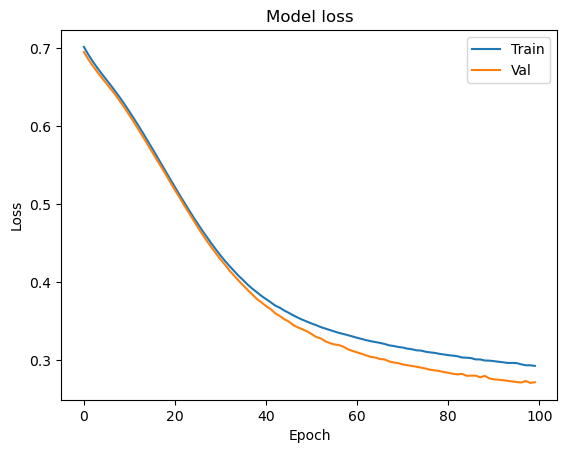

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

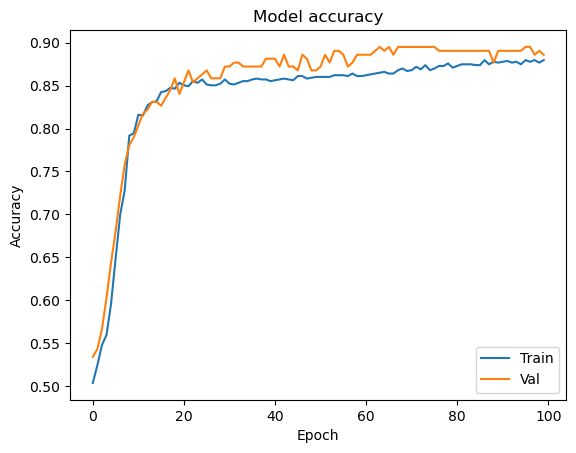

In [23]:
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### Regularization

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 23ms/step - loss: 0.5344 - accuracy: 0.7172 - val_loss: 0.4961 - val_accuracy: 0.7991
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3872 - accuracy: 0.8366 - val_loss: 0.2836 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3415 - accuracy: 0.8523 - val_loss: 0.3128 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3031 - accuracy: 0.8728 - val_loss: 0.2565 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2767 - accuracy: 0.8885 - val_loss: 0.2813 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2909 - accuracy: 0.8796 - val_loss: 0.2528 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2647 - accuracy: 0.8826 - val_loss: 0.2562 - val_accuracy: 0.8813
Epoch 

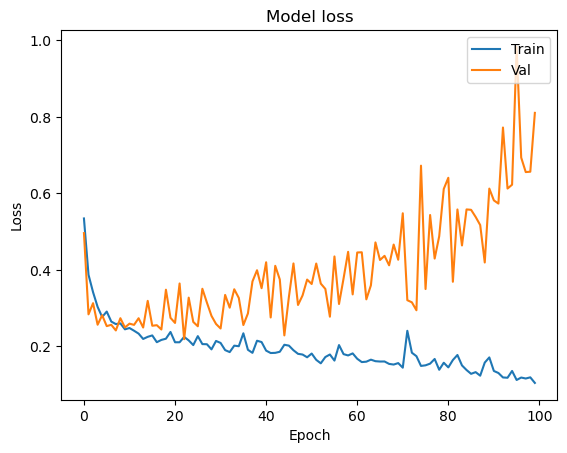

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

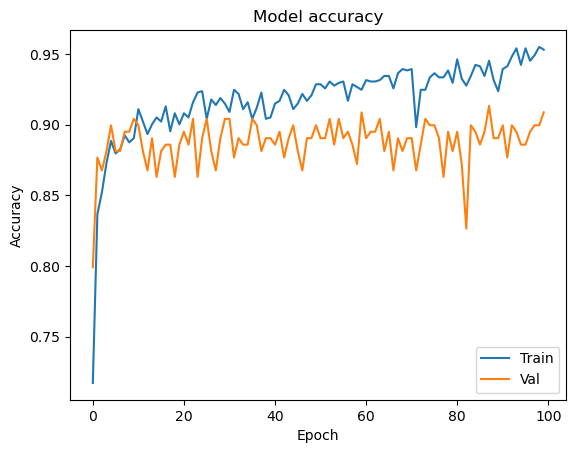

In [26]:
plt.plot(hist_2.history['accuracy']) 
plt.plot(hist_2.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 30ms/step - loss: 14.2878 - accuracy: 0.6155 - val_loss: 3.9611 - val_accuracy: 0.7945
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 1.6882 - accuracy: 0.8278 - val_loss: 0.6338 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5681 - accuracy: 0.8562 - val_loss: 0.4933 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.5113 - accuracy: 0.8708 - val_loss: 0.4620 - val_accuracy: 0.9132
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.5177 - accuracy: 0.8601 - val_loss: 0.4595 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.4980 - accuracy: 0.8689 - val_loss: 0.4598 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.4758 - accuracy: 0.8777 - val_loss: 0.4620 - val_accuracy: 0.8858
Epoch

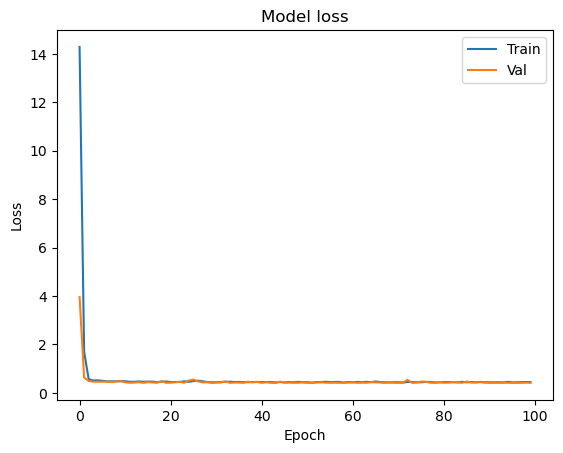

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

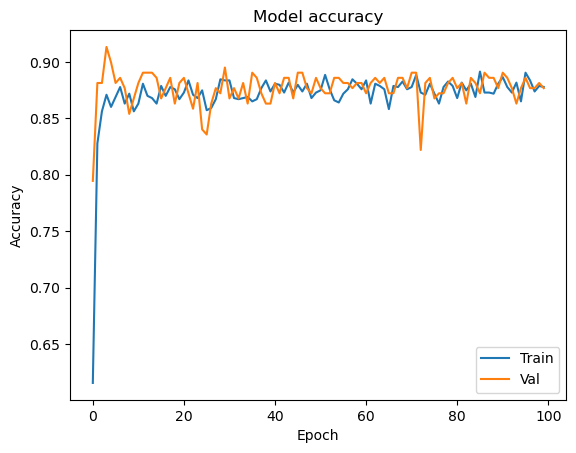

In [30]:
plt.plot(hist_3.history['accuracy']) 
plt.plot(hist_3.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### UCI Wine

#### Importing the libraries

In [31]:
!pip3 install -U ucimlrepo 

Looking in indexes: https://pypi.org/simple, https://:****@pkgs.dev.azure.com/KalmarEnergi/_packaging/KalmarEnergi/pypi/simple/


In [32]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [33]:
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Progno

In [34]:
wine = fetch_ucirepo(id=186)

In [35]:
X = wine.data.features
y = wine.data.targets

In [36]:
X

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 11 columns]

In [37]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(X_train.shape) 
print(X_test.shape) 

(5197, 11)
(1300, 11)


In [40]:
print(y_train.shape) 
print(y_test.shape) 

(5197, 1)
(1300, 1)


In [41]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497, 1)


In [42]:
scaler = StandardScaler().fit(X_train)

In [43]:
X_train = scaler.transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [45]:
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

In [46]:
num_classes = y_train['quality'].nunique()
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)), 
    Dense(num_classes, activation='softmax')  
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
5197/5197 [==============================] - 10s 2ms/step - loss: 1.1324 - accuracy: 0.5297
Epoch 2/20
5197/5197 [==============================] - 13s 3ms/step - loss: 1.0598 - accuracy: 0.5580
Epoch 3/20
5197/5197 [==============================] - 9s 2ms/step - loss: 1.0404 - accuracy: 0.5603
Epoch 4/20
5197/5197 [==============================] - 11s 2ms/step - loss: 1.0295 - accuracy: 0.5659
Epoch 5/20
5197/5197 [==============================] - 9s 2ms/step - loss: 1.0206 - accuracy: 0.5676
Epoch 6/20
5197/5197 [==============================] - 11s 2ms/step - loss: 1.0150 - accuracy: 0.5624
Epoch 7/20
5197/5197 [==============================] - 11s 2ms/step - loss: 1.0071 - accuracy: 0.5624
Epoch 8/20
5197/5197 [==============================] - 11s 2ms/step - loss: 1.0050 - accuracy: 0.5676
Epoch 9/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.9963 - accuracy: 0.5682
Epoch 10/20
5197/5197 [==============================] - 10s 2ms/step - los

#### Model Evaluation

In [47]:
y_pred = model.predict(X_test)

41/41 [==============================] - 0s 2ms/step


In [48]:
y_pred[:5]

array([[3.8517447e-04, 2.0863341e-04, 1.4435433e-02, 6.9787550e-01,
        2.1690805e-01, 7.0187181e-02, 1.4220781e-08],
       [2.8671424e-03, 4.8450790e-02, 8.3825636e-01, 1.0994964e-01,
        4.4816727e-04, 2.7890772e-05, 2.6330059e-16],
       [2.8219662e-04, 2.2313163e-04, 8.7037068e-03, 2.7595431e-01,
        6.2846214e-01, 8.6153127e-02, 2.2134253e-04],
       [6.0387619e-04, 2.7341880e-03, 3.8974565e-01, 5.8159542e-01,
        2.3630489e-02, 1.6904309e-03, 6.0307402e-19],
       [5.0164987e-03, 1.3291215e-02, 6.4563769e-01, 3.3196640e-01,
        2.5977194e-03, 1.4904635e-03, 2.1164475e-23]], dtype=float32)

In [49]:
y_test[:5]

quality
3103        5
1419        2
4761        4
4690        3
4032        3

In [50]:
score = model.evaluate(X_test, y_test,verbose=1)

41/41 [==============================] - 0s 2ms/step - loss: 1.0462 - accuracy: 0.5577


In [51]:
print(score)

[1.0462327003479004, 0.557692289352417]


In [52]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_adjusted = y_test - y_test.min()
cm = confusion_matrix(y_test_adjusted, y_pred_classes)

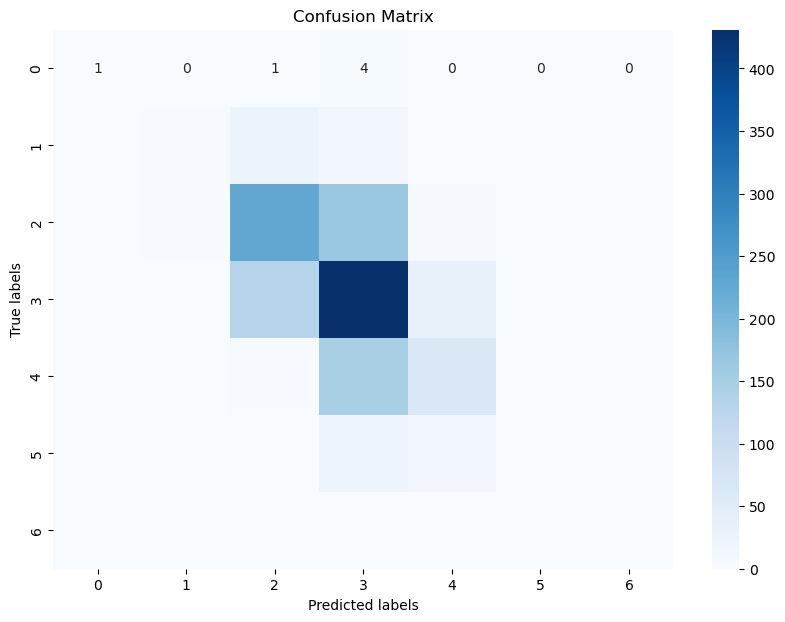

In [53]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
precision_score(y_test_adjusted, y_pred_classes, average='weighted')

0.5357705532400179

In [55]:
recall_score(y_test_adjusted, y_pred_classes, average='weighted')

0.5576923076923077

In [56]:
f1_score(y_test_adjusted, y_pred_classes, average='weighted')

0.5313252119337749

In [57]:
cohen_kappa_score(y_test_adjusted, y_pred_classes)

0.2809153490662961

#### Compile the Model, Fit the Data

In [58]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=11, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X.iloc[train], y.iloc[train], epochs=10, verbose=1)
    mse_value, mae_value = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
    print('MSE:', mse_value)
    print('MAE:', mae_value)
    y_pred = model.predict(X.iloc[test])
    print('R-Squared:', r2_score(y.iloc[test], y_pred))

Epoch 1/10
163/163 [==============================] - 1s 2ms/step - loss: 186.8486 - mae: 5.9452
Epoch 2/10
163/163 [==============================] - 0s 2ms/step - loss: 1.4290 - mae: 0.9319
Epoch 3/10
163/163 [==============================] - 0s 2ms/step - loss: 1.3235 - mae: 0.9119
Epoch 4/10
163/163 [==============================] - 0s 2ms/step - loss: 1.3340 - mae: 0.9026
Epoch 5/10
163/163 [==============================] - 0s 2ms/step - loss: 1.2654 - mae: 0.8660
Epoch 6/10
163/163 [==============================] - 0s 2ms/step - loss: 1.2455 - mae: 0.8619
Epoch 7/10
163/163 [==============================] - 0s 2ms/step - loss: 1.2194 - mae: 0.8585
Epoch 8/10
163/163 [==============================] - 0s 2ms/step - loss: 1.2245 - mae: 0.8604
Epoch 9/10
163/163 [==============================] - 0s 2ms/step - loss: 1.2186 - mae: 0.8617
Epoch 10/10
163/163 [==============================] - 0s 2ms/step - loss: 1.2250 - mae: 0.8633
MSE: 1.441217303276062
MAE: 1.0043987035751343


#### Model Fine-Tuning

In [59]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=11, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    rmsprop = RMSprop(lr=0.0001)
    model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)
    mse_value, mae_value = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
    print('MSE:', mse_value)
    print('MAE:', mae_value)
    y_pred = model.predict(X.iloc[test])
    print('R-Squared:', r2_score(y.iloc[test], y_pred))

Epoch 1/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.7157 - mae: 0.6444
Epoch 2/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.5495 - mae: 0.5711
Epoch 3/20
5197/5197 [==============================] - 11s 2ms/step - loss: 0.5260 - mae: 0.5573
Epoch 4/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.5064 - mae: 0.5483
Epoch 5/20
5197/5197 [==============================] - 11s 2ms/step - loss: 0.5011 - mae: 0.5443
Epoch 6/20
5197/5197 [==============================] - 12s 2ms/step - loss: 0.4917 - mae: 0.5405
Epoch 7/20
5197/5197 [==============================] - 13s 3ms/step - loss: 0.4877 - mae: 0.5346
Epoch 8/20
5197/5197 [==============================] - 12s 2ms/step - loss: 0.4824 - mae: 0.5340
Epoch 9/20
5197/5197 [==============================] - 11s 2ms/step - loss: 0.4741 - mae: 0.5267
Epoch 10/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.4693 - mae: 0.5237
Epoch 11/20
5197/519

In [60]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=11, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    sgd=SGD(lr=0.1)
    model.compile(optimizer=sgd, loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)
    mse_value, mae_value = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
    print('MSE:', mse_value)
    print('MAE:', mae_value)
    y_pred = model.predict(X.iloc[test])
    print('R-Squared:', r2_score(y.iloc[test], y_pred))

Epoch 1/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.5972 - mae: 0.5945
Epoch 2/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.5127 - mae: 0.5565
Epoch 3/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.4974 - mae: 0.5493
Epoch 4/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.4821 - mae: 0.5431
Epoch 5/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.4730 - mae: 0.5354
Epoch 6/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.4662 - mae: 0.5314
Epoch 7/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.4574 - mae: 0.5264
Epoch 8/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.4528 - mae: 0.5249
Epoch 9/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.4482 - mae: 0.5218
Epoch 10/20
5197/5197 [==============================] - 10s 2ms/step - loss: 0.4413 - mae: 0.5193
Epoch 11/20
5197/5197 [===

### Clustering

#### Importing the libraries

In [61]:
%%capture
!pip install statsmodels

In [62]:
import requests
from io import StringIO
from sklearn import metrics
from sklearn.cluster import DBSCAN
import itertools
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
import plotly.express as px
from math import pi

#### Demo of DBSCAN clustering algorithm

In [63]:
centers = [[1, 1], [-1, -1], [1, -1]]

In [64]:
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

In [65]:
X = StandardScaler().fit_transform(X)

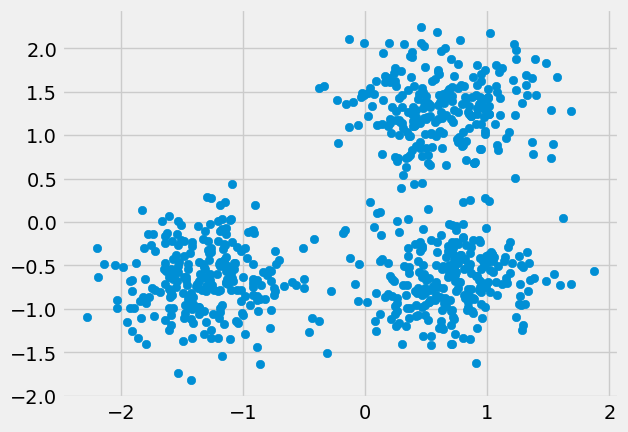

In [66]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [67]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

In [68]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [69]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [70]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


In [71]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

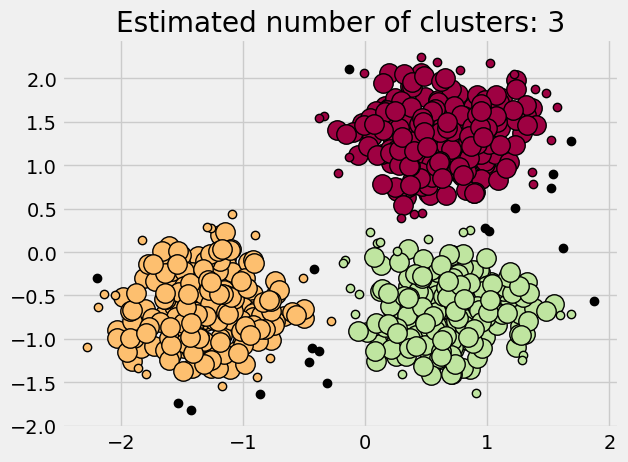

In [72]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

#### Mall Customer

In [73]:
file_path = 'data/Mall_Customers.csv'
df = pd.read_csv(file_path)

In [74]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [75]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [77]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [78]:
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [79]:
df.drop('CustomerID', axis=1, inplace=True)

In [80]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [81]:
df

Gender  Age  Income  SpendScore
0      Male   19      15          39
1      Male   21      15          81
2    Female   20      16           6
3    Female   23      16          77
4    Female   31      17          40
..      ...  ...     ...         ...
195  Female   35     120          79
196  Female   45     126          28
197    Male   32     126          74
198    Male   32     137          18
199    Male   30     137          83

[200 rows x 4 columns]

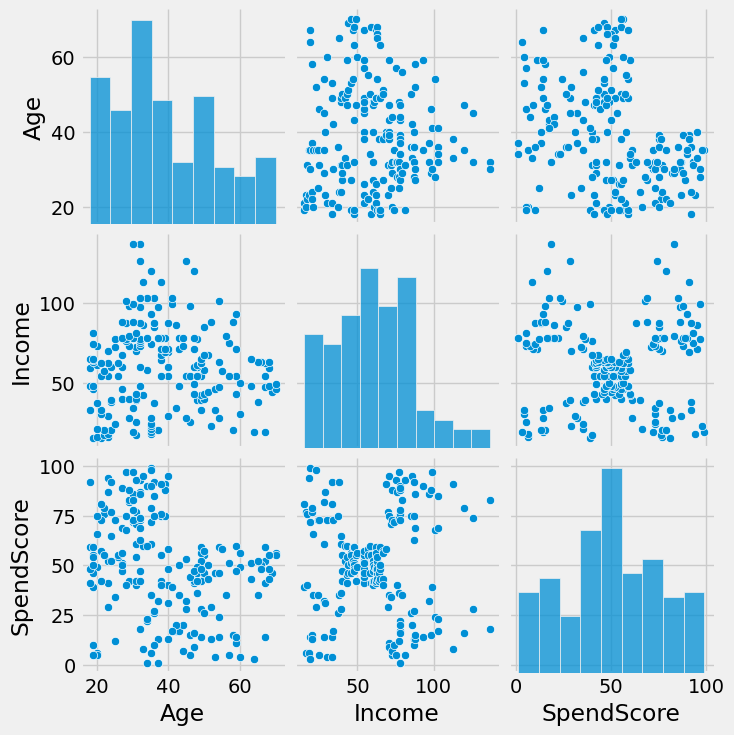

In [82]:
sns.pairplot(df)

<Axes: >

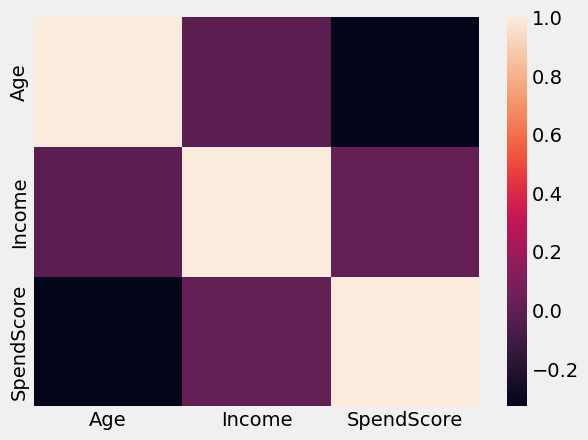

In [83]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

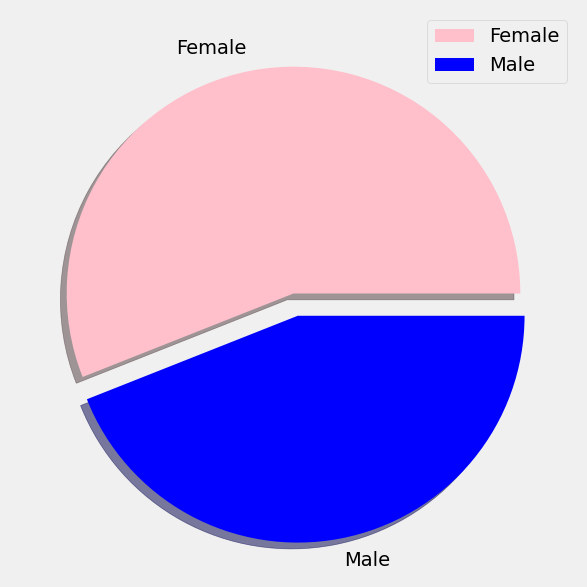

In [84]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

(array([0]), [Text(0, 0, '0')])

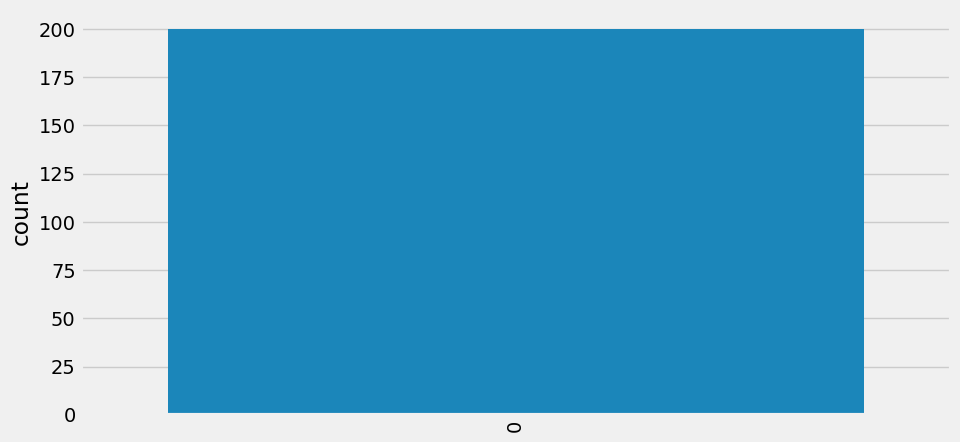

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

<Axes: xlabel='Gender', ylabel='SpendScore'>

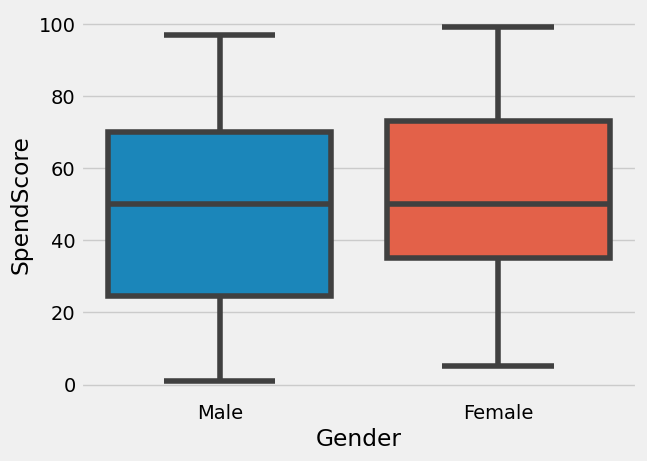

In [86]:
sns.boxplot(x='Gender', y='SpendScore', data=df)

<Axes: ylabel='count'>

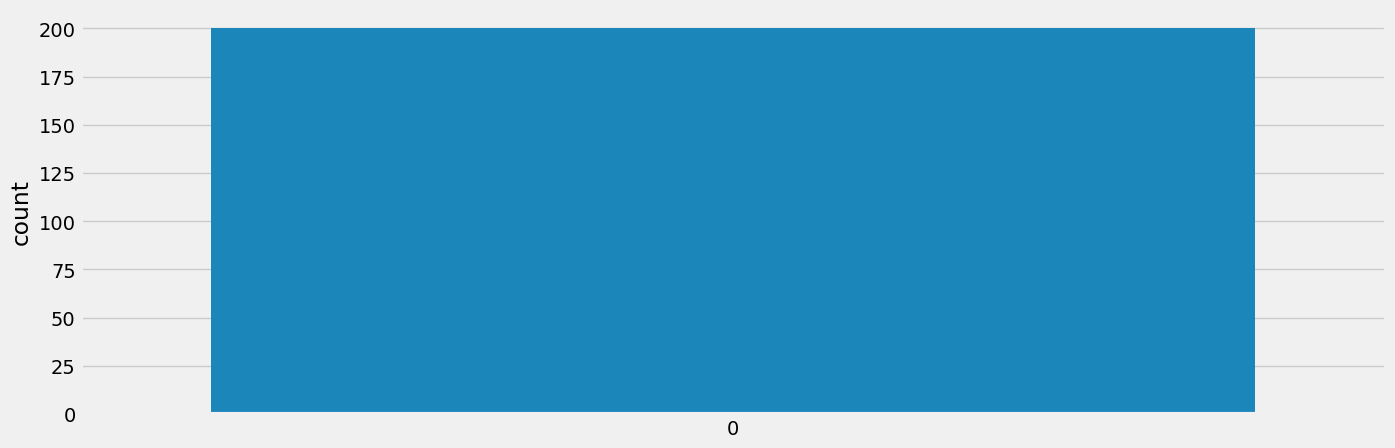

In [87]:
plt.figure(figsize=(15,5))
sns.countplot(df['Income'])

Text(0, 0.5, 'Spendscore')

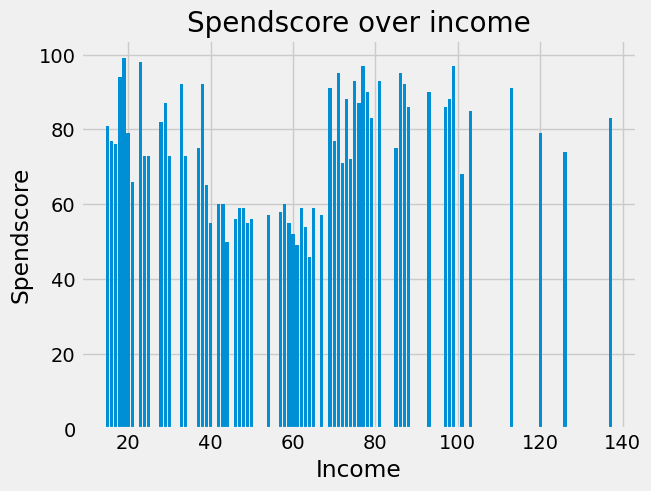

In [88]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

In [89]:
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])

In [90]:
df

Gender  Age  Income  SpendScore  GenderEncoded
0      Male   19      15          39              1
1      Male   21      15          81              1
2    Female   20      16           6              0
3    Female   23      16          77              0
4    Female   31      17          40              0
..      ...  ...     ...         ...            ...
195  Female   35     120          79              0
196  Female   45     126          28              0
197    Male   32     126          74              1
198    Male   32     137          18              1
199    Male   30     137          83              1

[200 rows x 5 columns]

In [91]:
x = df.drop('Gender', axis=1).to_numpy()

In [92]:
x.shape

(200, 4)

In [93]:
def perform_dbscan_and_visualize(df, eps, min_samples):
    if 'Cluster' in df.columns:
        df = df.drop('Cluster', axis=1)
    
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    df['Cluster'] = db.fit_predict(x)

    fig_2d = px.scatter(df, x='Income', y='SpendScore', color='Cluster',
                        title=f'DBSCAN Clustering (eps={eps}, min_samples={min_samples}) - 2D Scatter Plot',
                        hover_data=df.columns, width=800, height=600)
    fig_2d.update_layout(legend_title_text='Cluster')
    fig_2d.show()

    fig_3d = px.scatter_3d(df, x='Income', y='SpendScore', z='Age', color='Cluster',
                           title=f'DBSCAN Clustering (eps={eps}, min_samples={min_samples}) - 3D Scatter Plot',
                           hover_data=df.columns, width=800, height=600)
    fig_3d.update_layout(legend_title_text='Cluster')
    fig_3d.show()

    cluster_counts = df['Cluster'].value_counts().reset_index()
    cluster_counts.columns = ['Cluster', 'Count']
    fig_bar = px.bar(cluster_counts, x='Cluster', y='Count', text='Count',
                     title='Cluster Sizes Distribution')
    fig_bar.update_traces(texttemplate='%{text}', textposition='outside')
    fig_bar.update_layout(xaxis_title='Cluster', yaxis_title='Count', width=800, height=600)
    fig_bar.show()

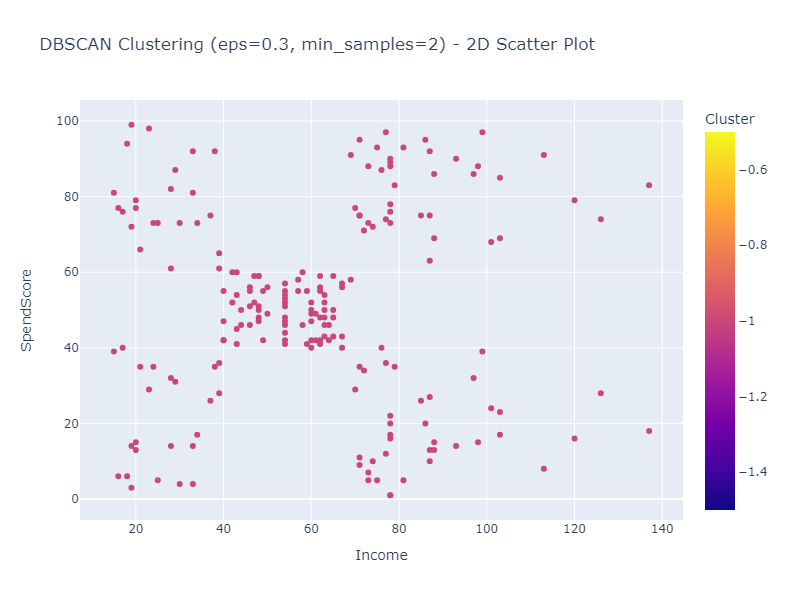

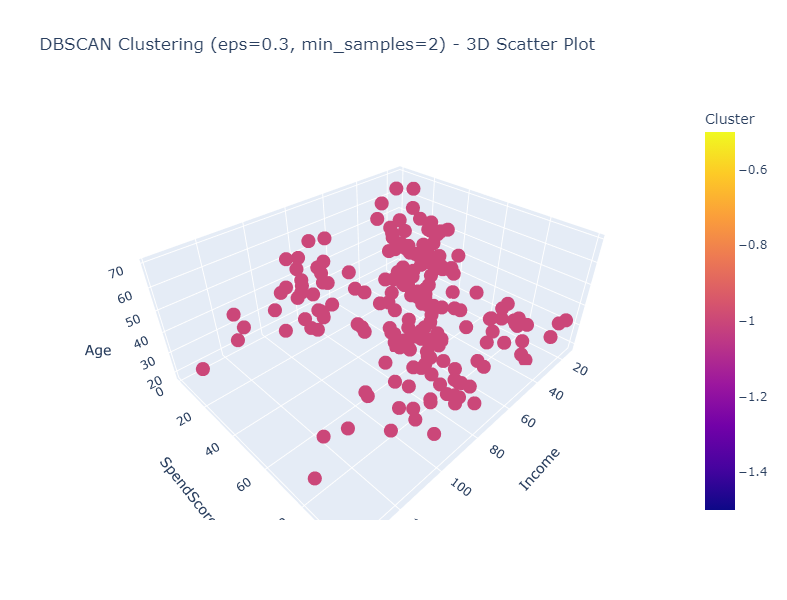

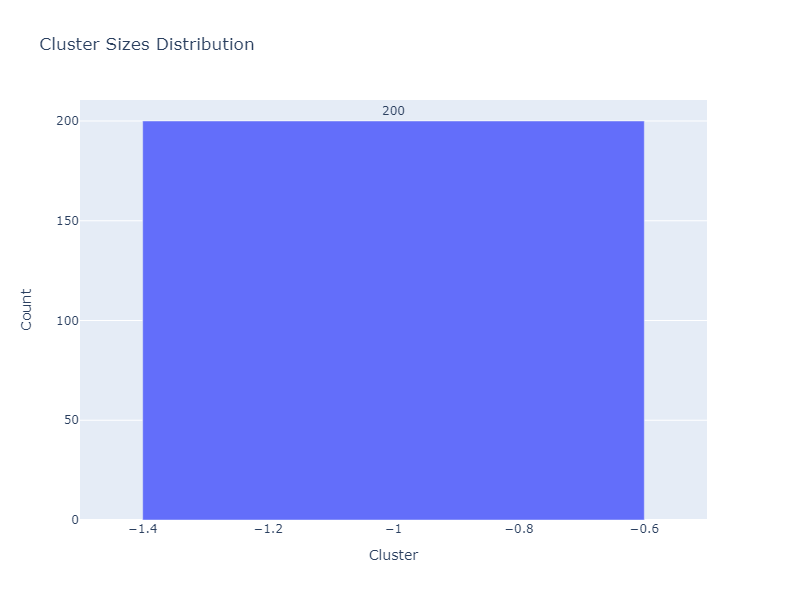

In [94]:
perform_dbscan_and_visualize(df, eps=0.3, min_samples=2)

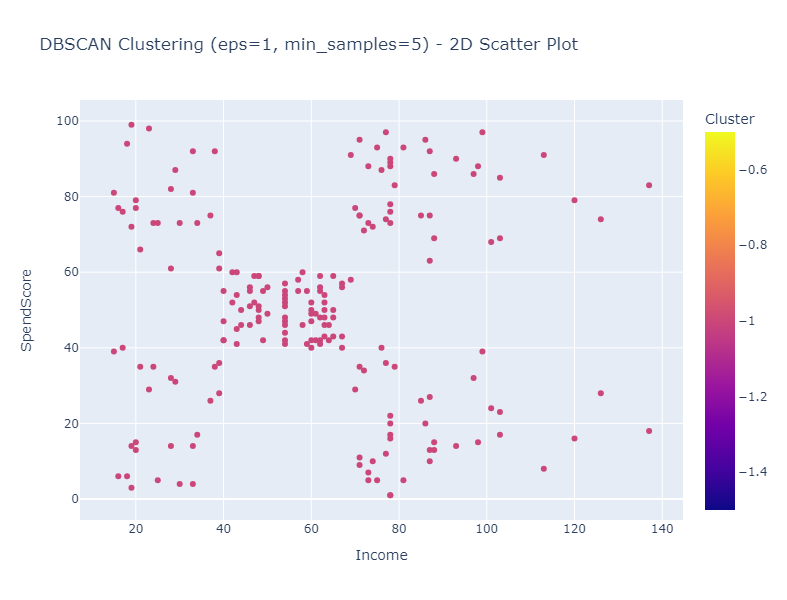

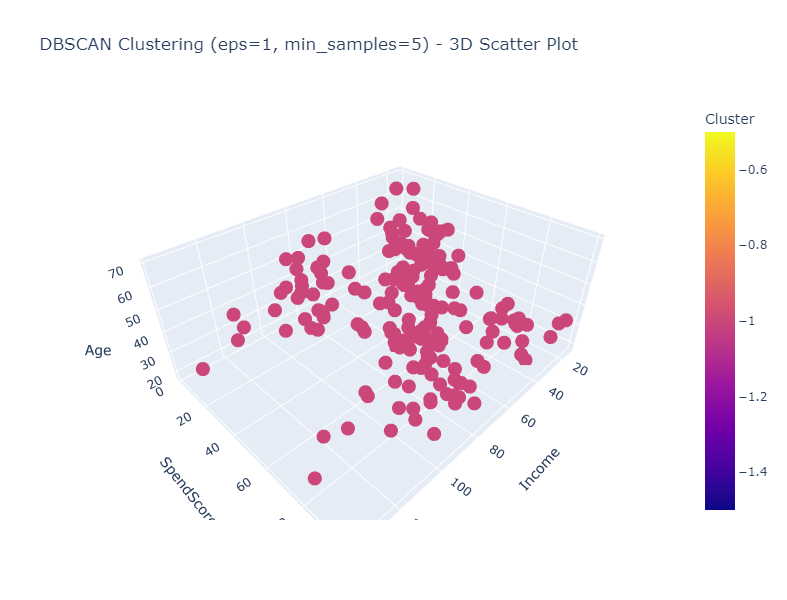

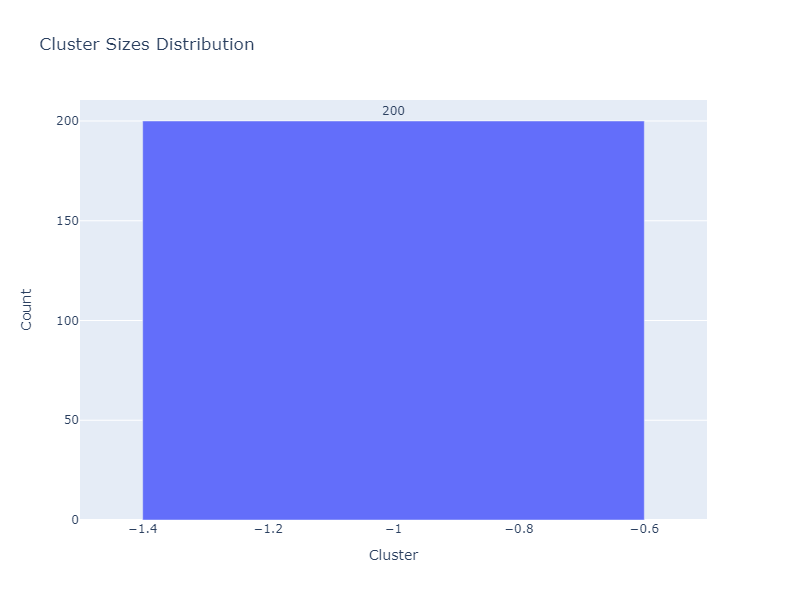

In [95]:
perform_dbscan_and_visualize(df, eps=1, min_samples=5)

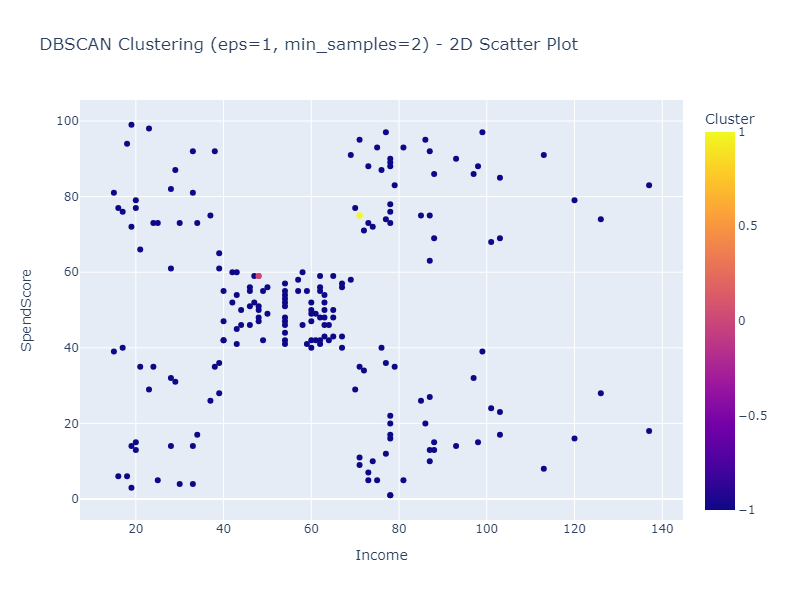

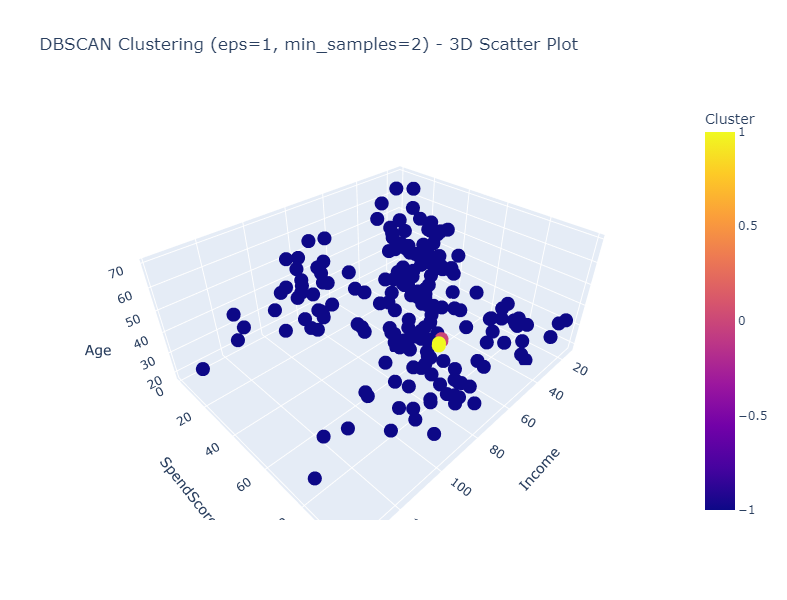

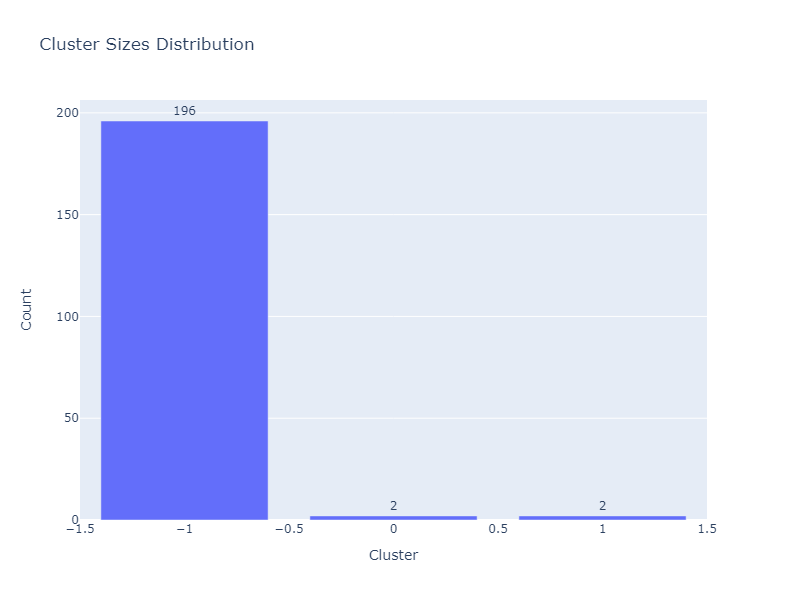

In [96]:
perform_dbscan_and_visualize(df, eps=1, min_samples=2)

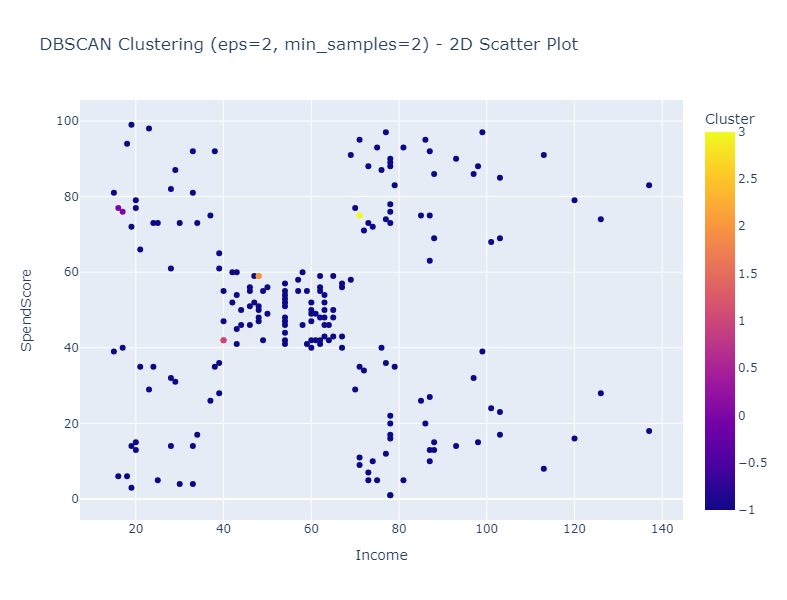

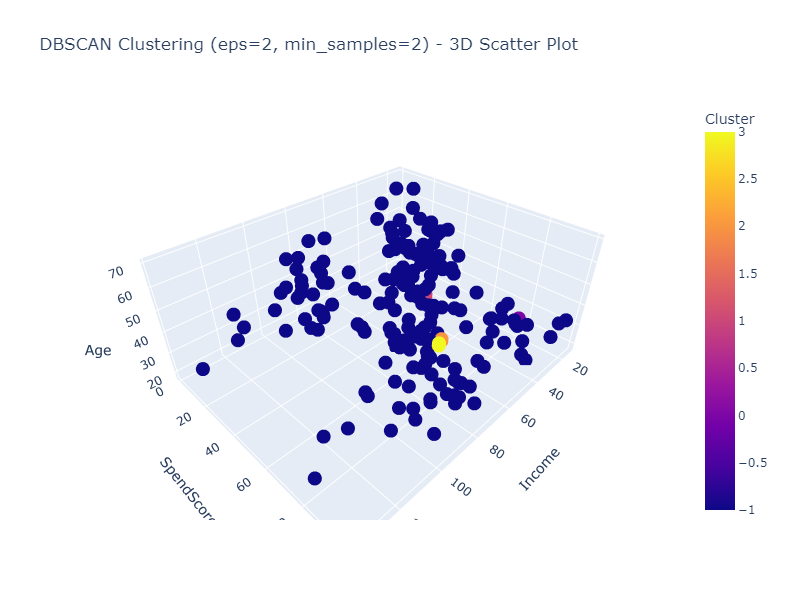

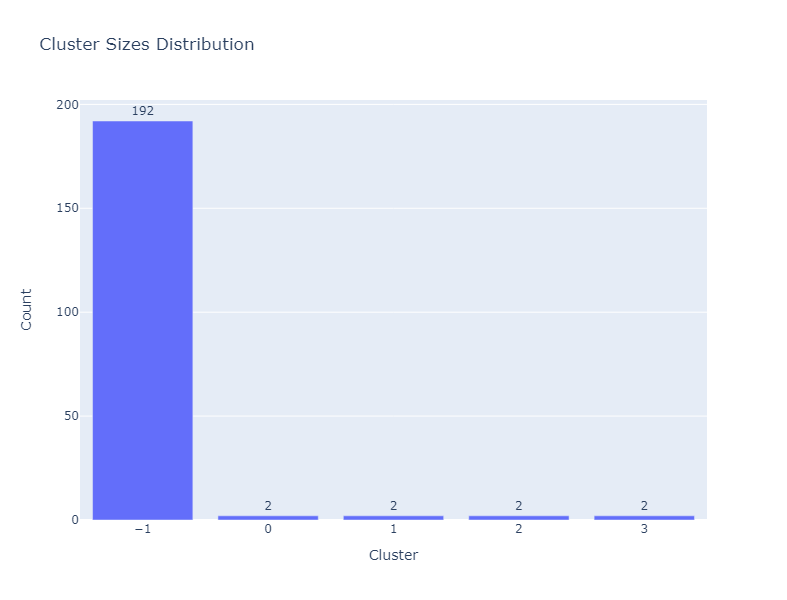

In [97]:
perform_dbscan_and_visualize(df, eps=2, min_samples=2)

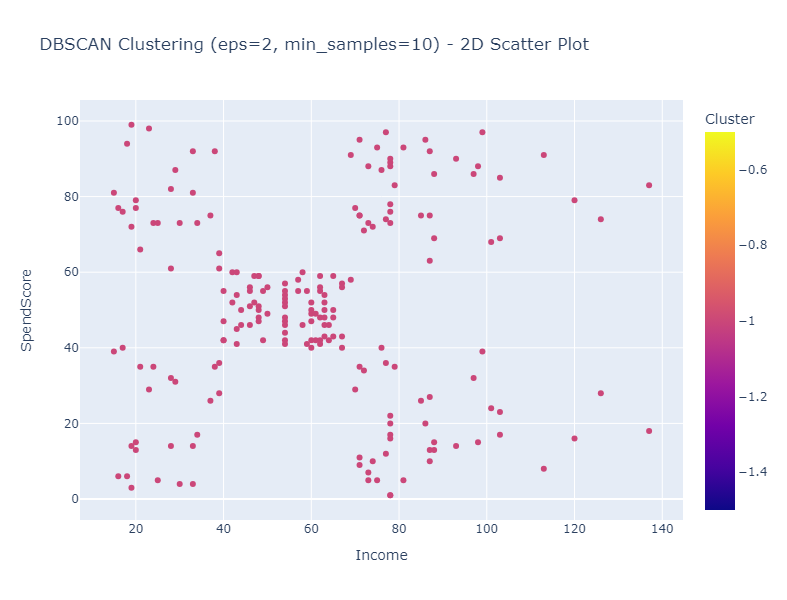

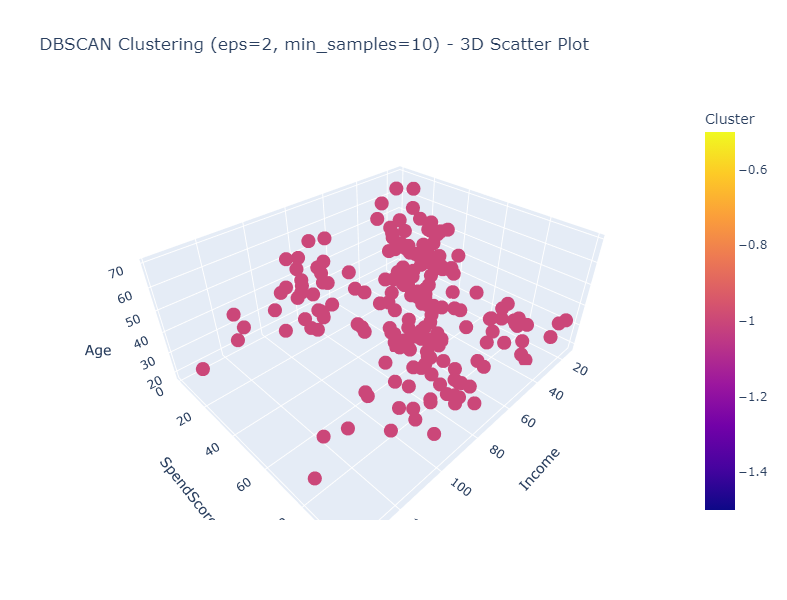

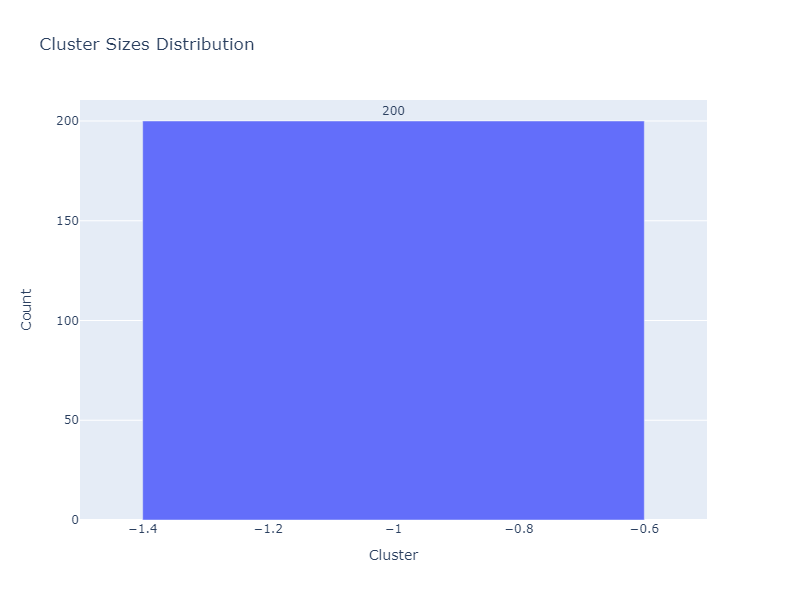

In [98]:
perform_dbscan_and_visualize(df, eps=2, min_samples=10)

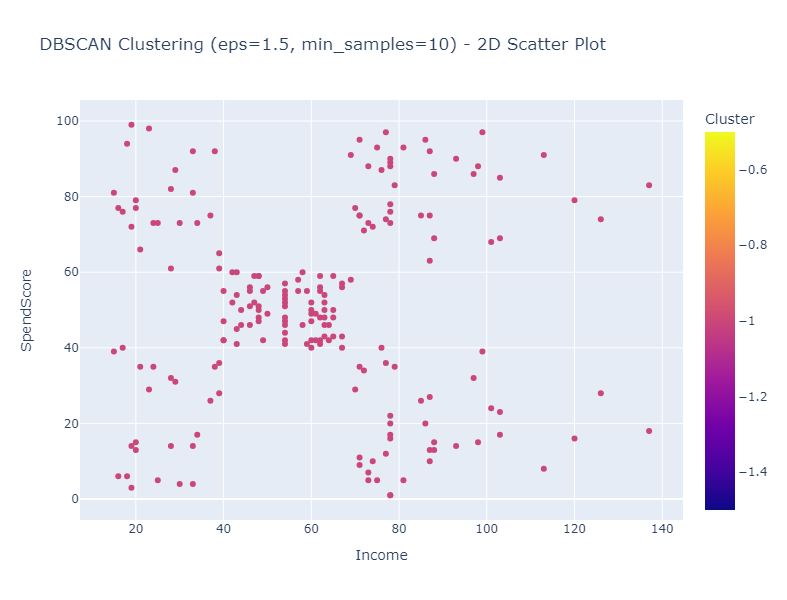

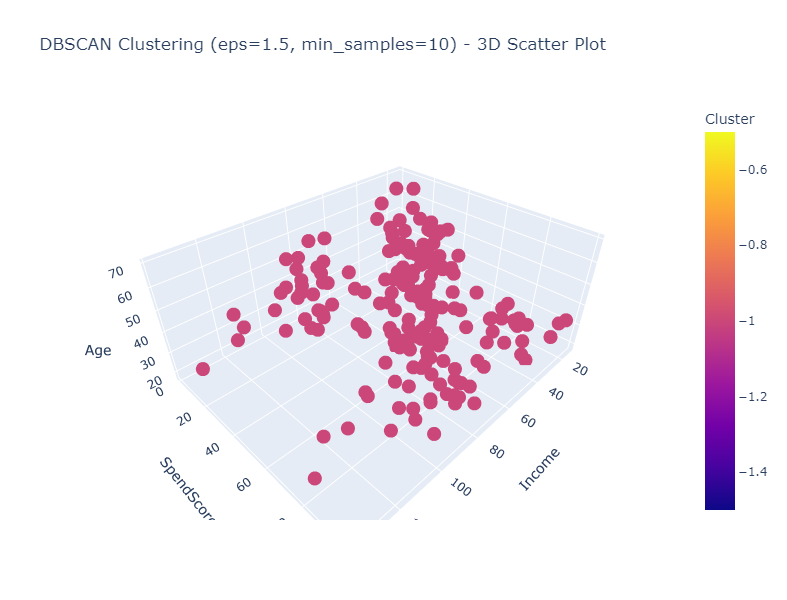

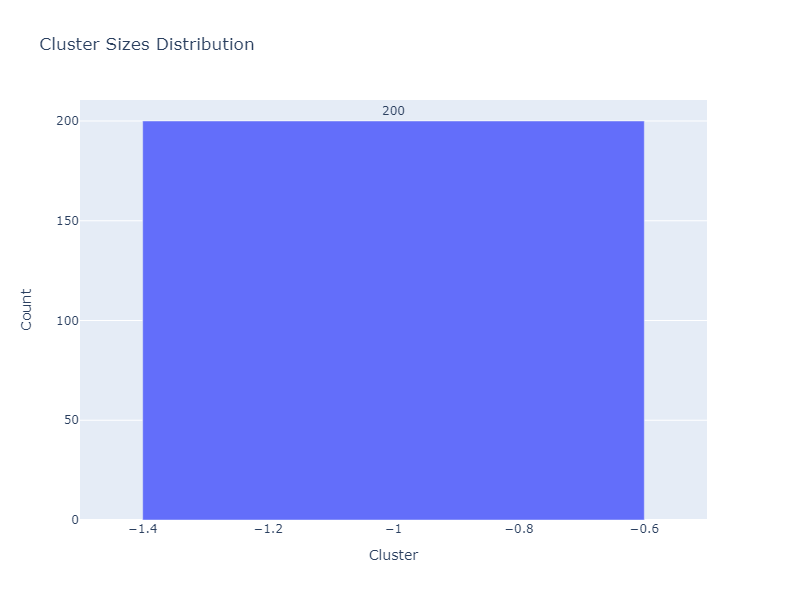

In [99]:
perform_dbscan_and_visualize(df, eps=1.5, min_samples=10)

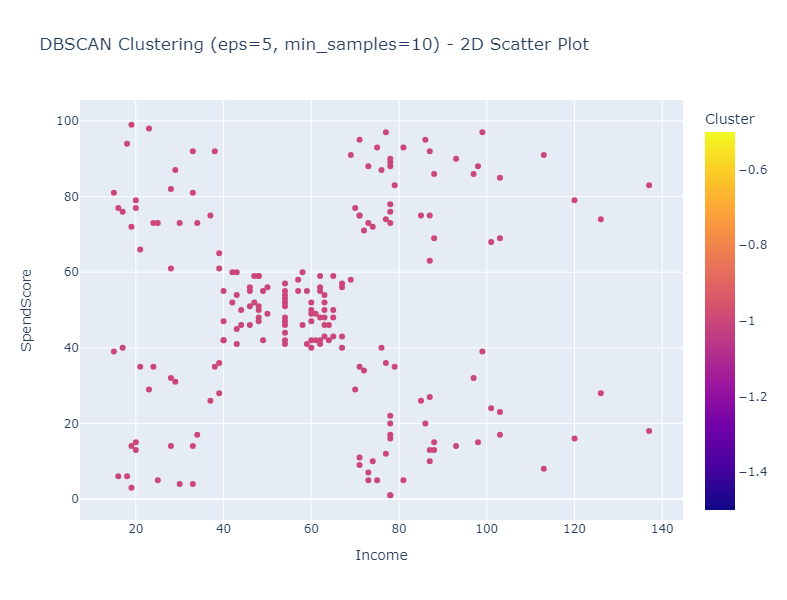

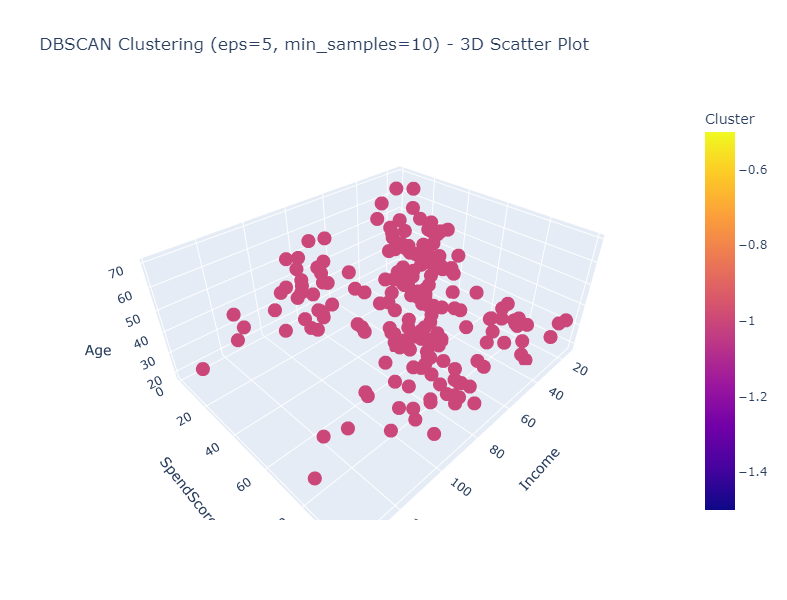

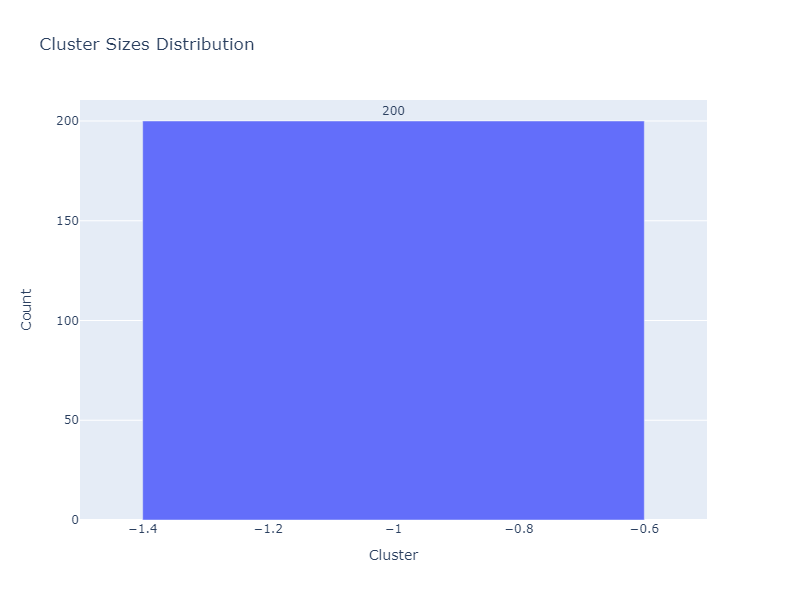

In [100]:
perform_dbscan_and_visualize(df, eps=5, min_samples=10)

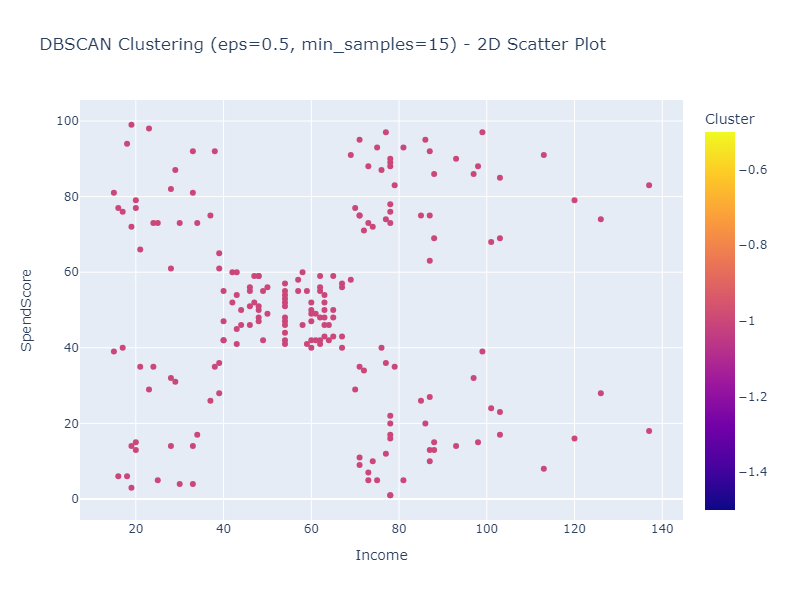

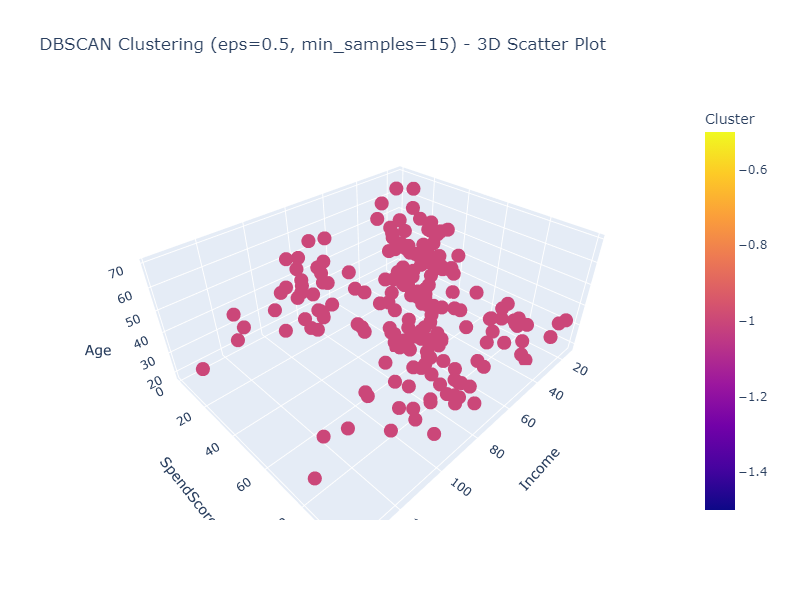

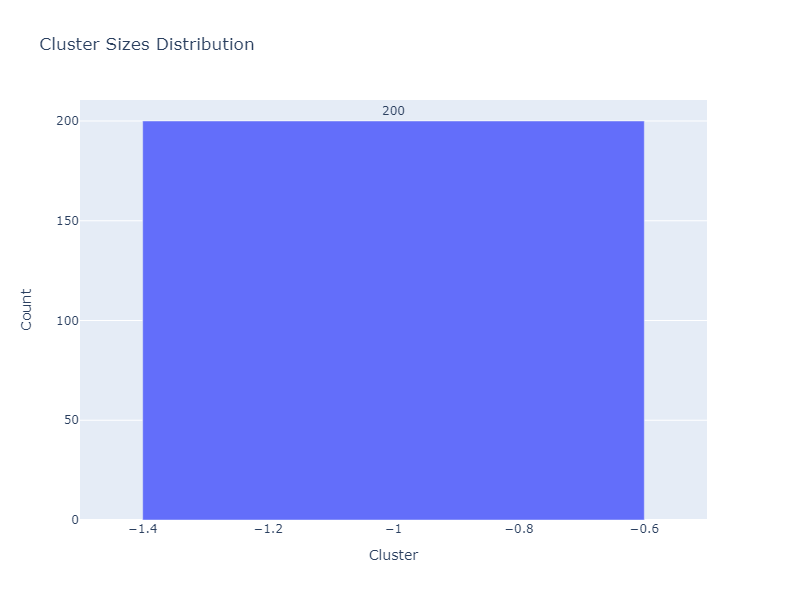

In [101]:
perform_dbscan_and_visualize(df, eps=0.5, min_samples=15)

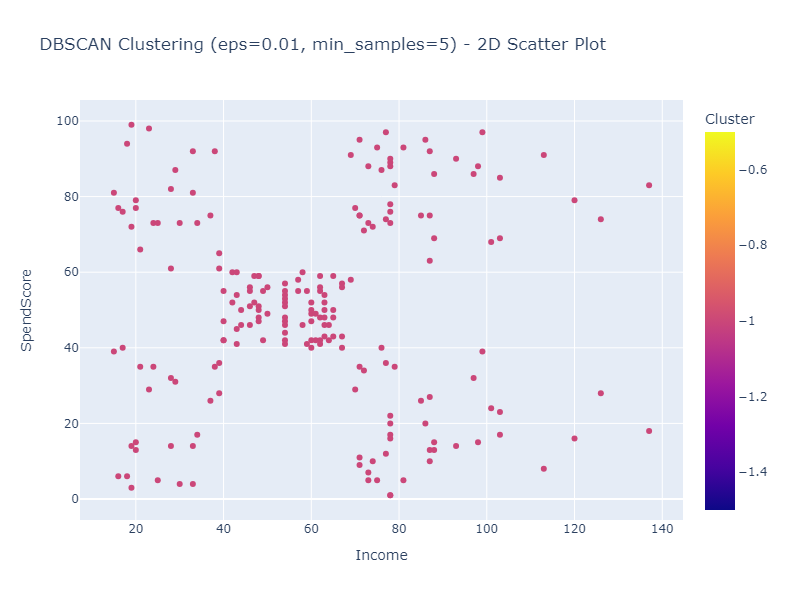

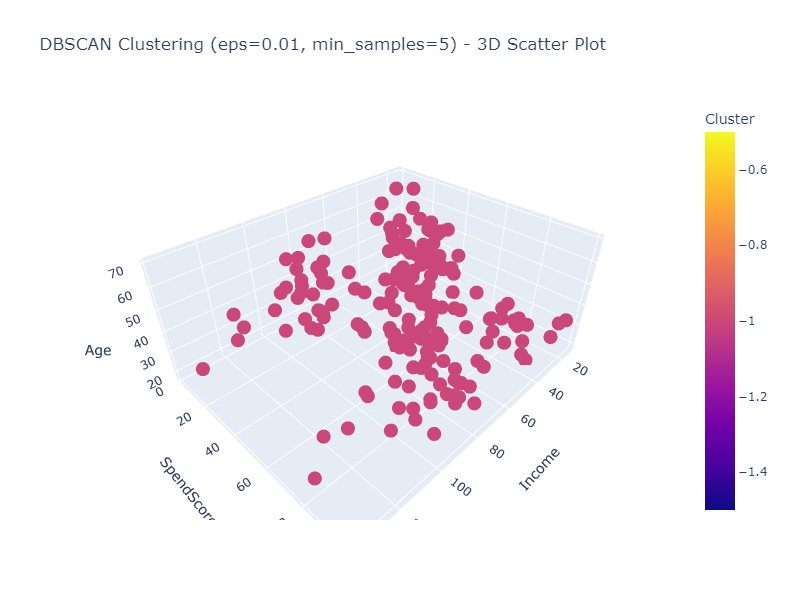

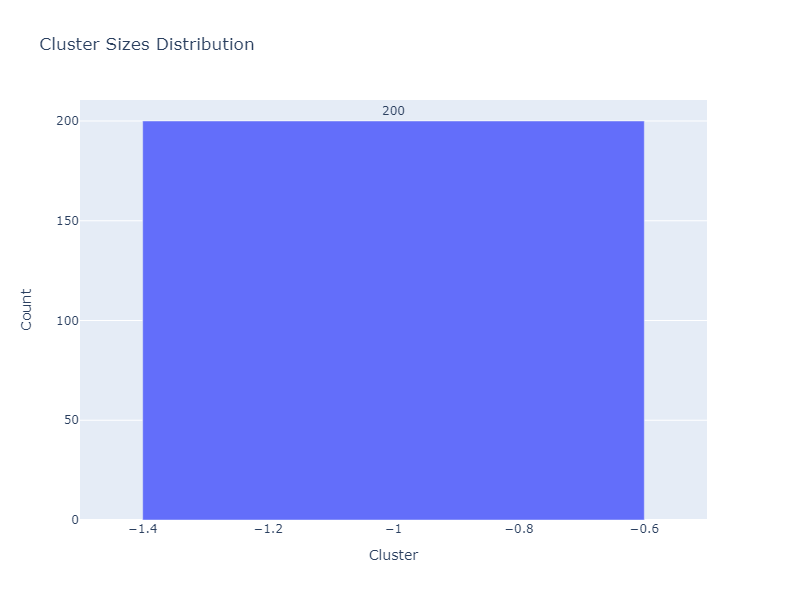

In [102]:
perform_dbscan_and_visualize(df, eps=0.01, min_samples=5)

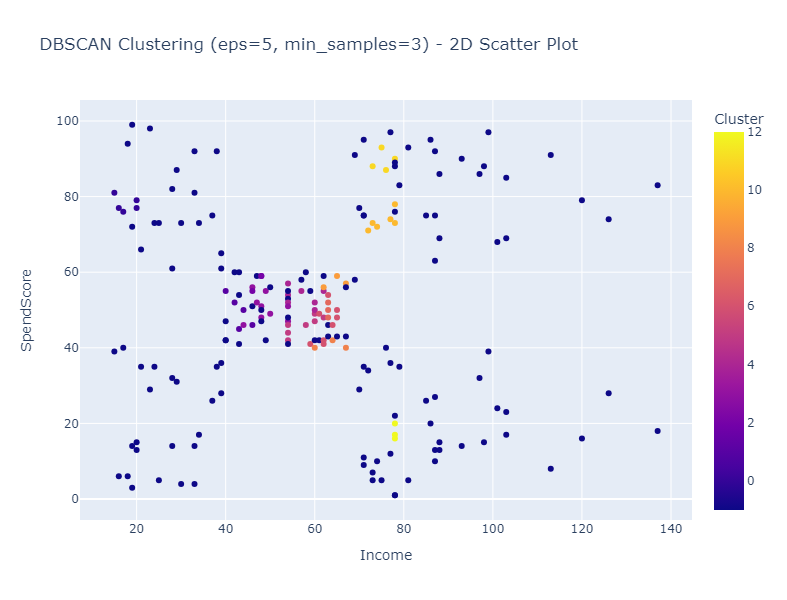

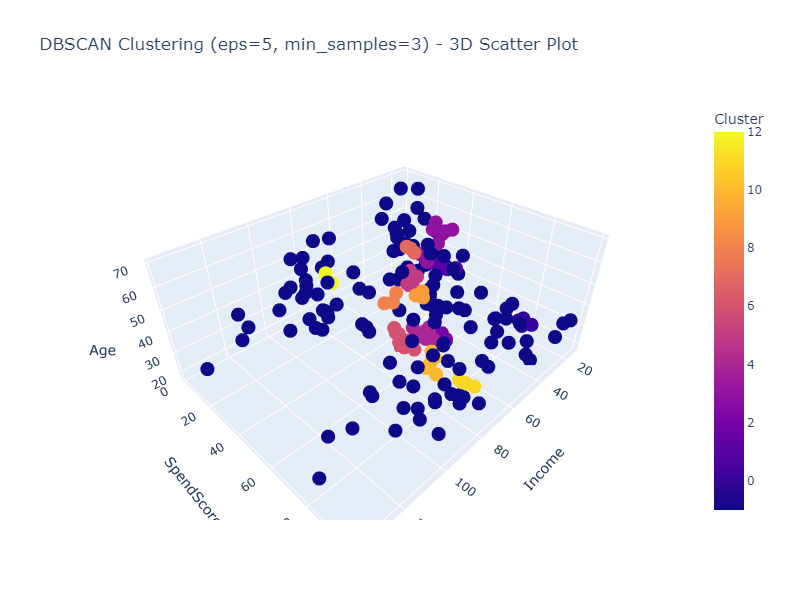

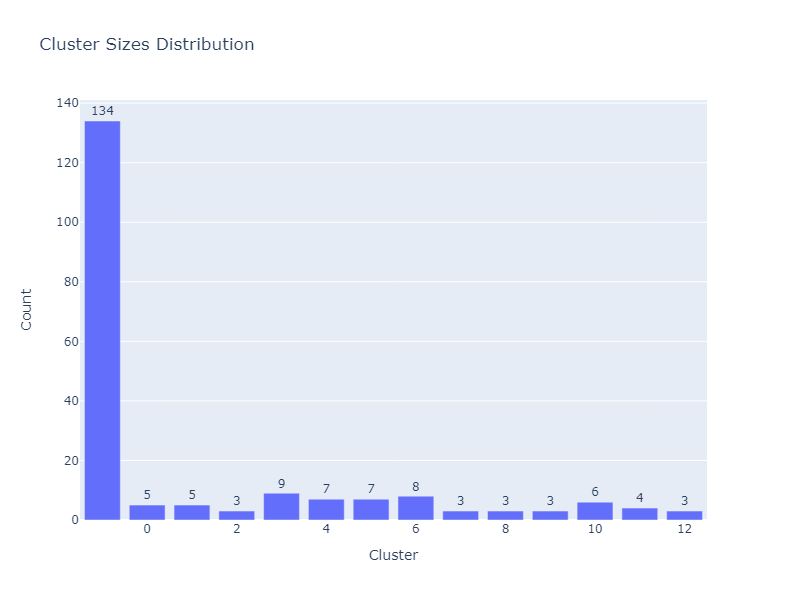

In [103]:
perform_dbscan_and_visualize(df, eps=5, min_samples=3)

In [104]:
label=db.labels_

In [105]:
label

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [106]:
sample_cores=np.zeros_like(label,dtype=bool)

In [107]:
sample_cores[db.core_sample_indices_]=True

In [108]:
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


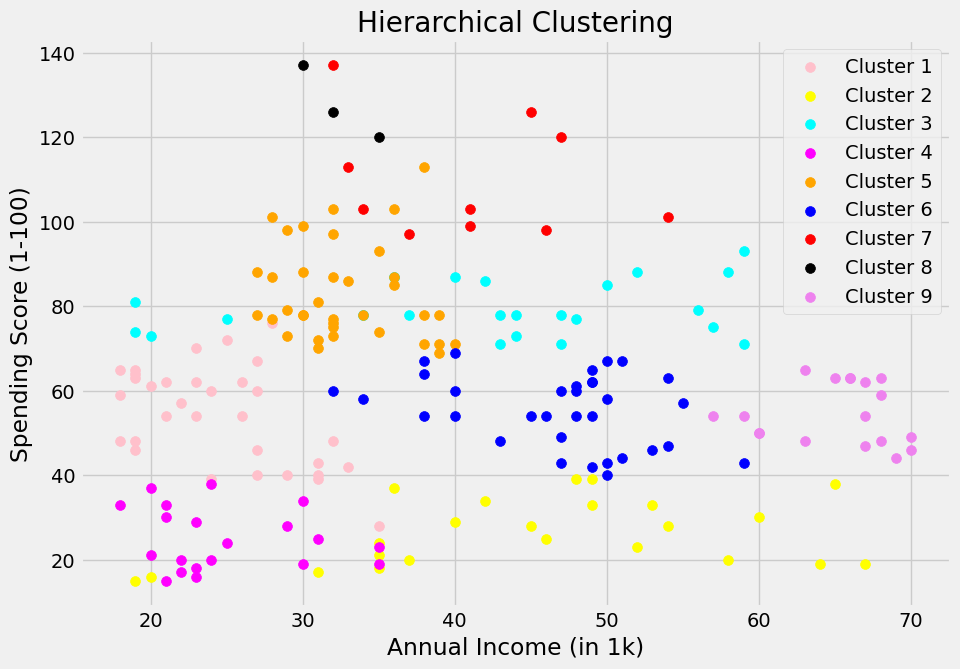

In [109]:
hc = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
plt.figure(figsize=(10, 7))
colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange', 'blue', 'red', 'black', 'violet']
for i in range(9):
    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Annual Income (in 1k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

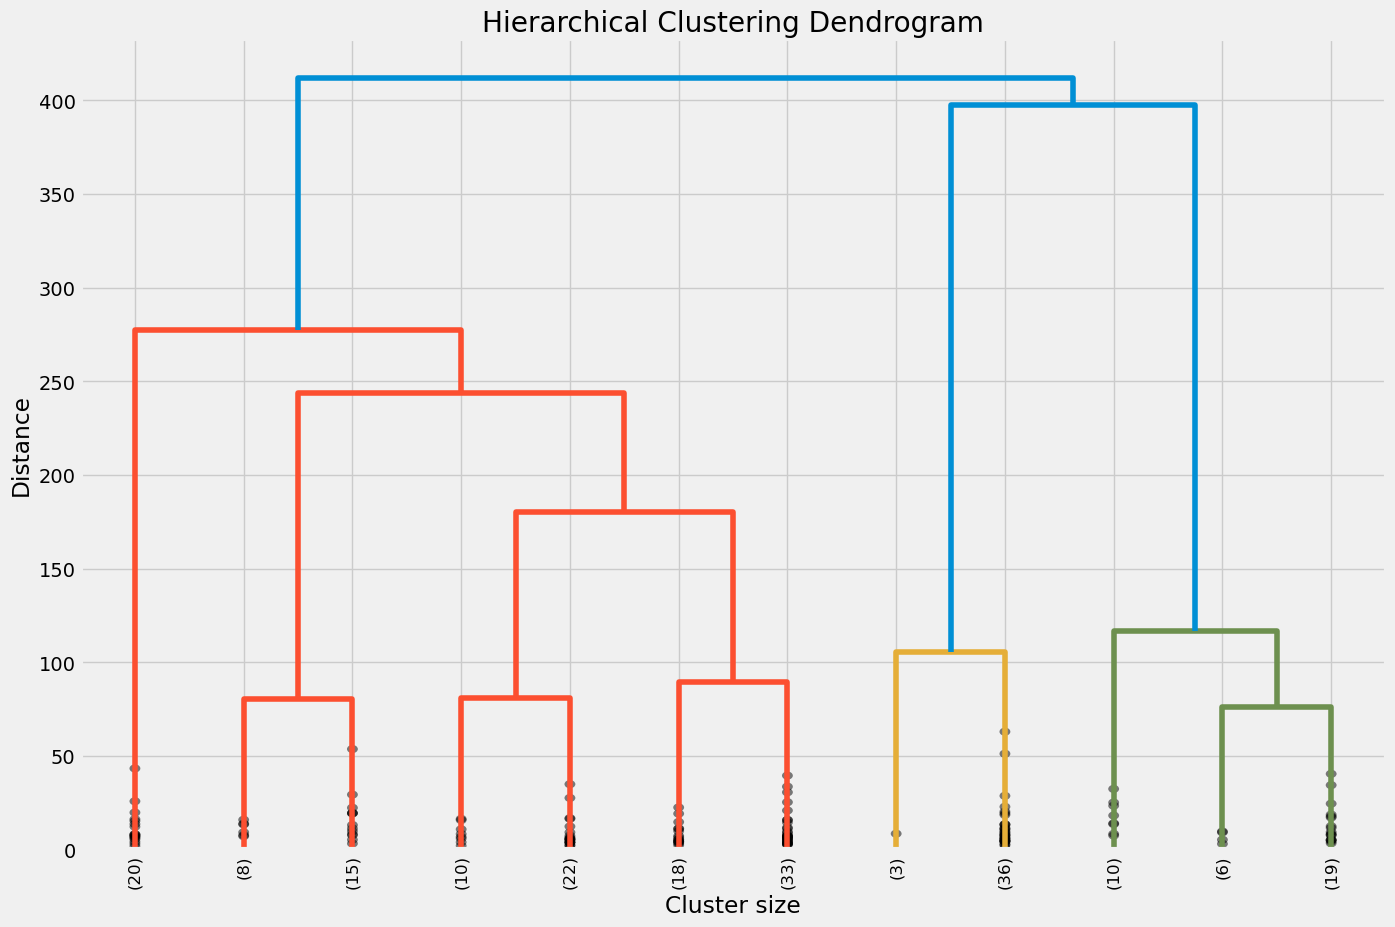

In [110]:
Z = linkage(x, method='ward', metric='euclidean')
plt.figure(figsize=(15, 10))
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=12,  
    leaf_rotation=90.,  
    leaf_font_size=12.,  
    show_contracted=True,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.axhline(y=500, c='k', ls='--', lw=0.5)  
plt.show()

In [111]:
features = df[['Age', 'GenderEncoded', 'Income', 'SpendScore']]

In [112]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

In [113]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features)

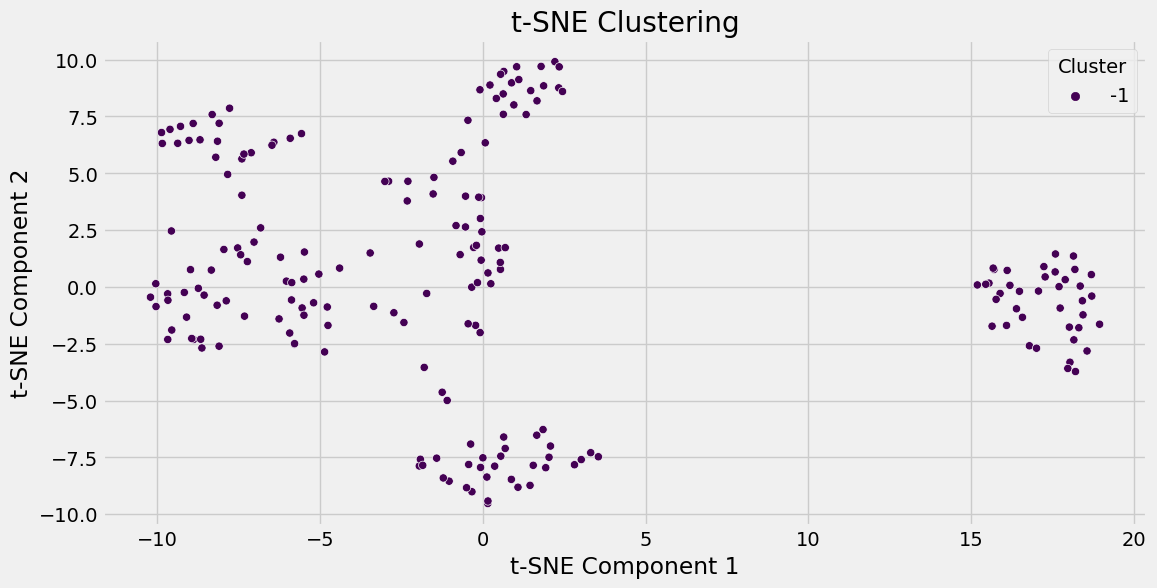

In [114]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

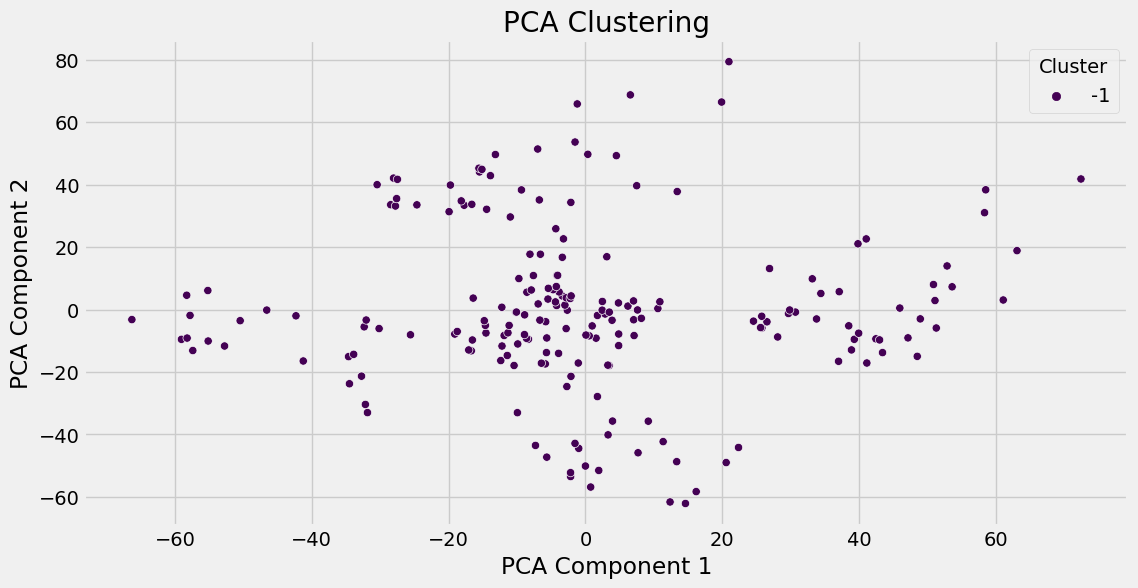

In [115]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('PCA Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

#### AWS Cloud Watch

In [116]:
url = "https://raw.githubusercontent.com/irojasgo/aws_anomaly_detection/main/ec2_cpu_utilization_825cc2.csv"
response = requests.get(url)
response.raise_for_status()
data = StringIO(response.text)

In [117]:
df = pd.read_csv(data)

In [118]:
df

timestamp   value
0     2014-04-10 00:04:00  91.958
1     2014-04-10 00:09:00  94.798
2     2014-04-10 00:14:00  92.208
3     2014-04-10 00:19:00  93.722
4     2014-04-10 00:24:00  93.042
...                   ...     ...
4027  2014-04-23 23:49:00  95.084
4028  2014-04-23 23:54:00  95.236
4029  2014-04-23 23:59:00  96.374
4030  2014-04-24 00:04:00  95.042
4031  2014-04-24 00:09:00  96.584

[4032 rows x 2 columns]

In [119]:
df.columns

Index(['timestamp', 'value'], dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [121]:
df.describe()

value
count  4032.000000
mean     89.791262
std      12.078708
min      18.722500
25%      89.081000
50%      92.449000
75%      94.299500
max      99.118000

In [122]:
print(df.isna().sum())

timestamp    0
value        0
dtype: int64


<Axes: >

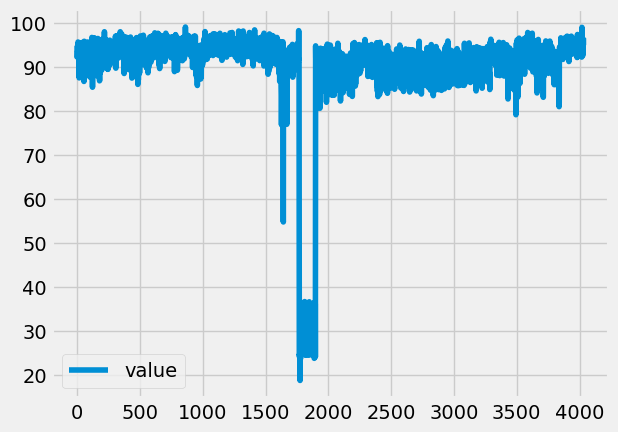

In [123]:
df.plot()

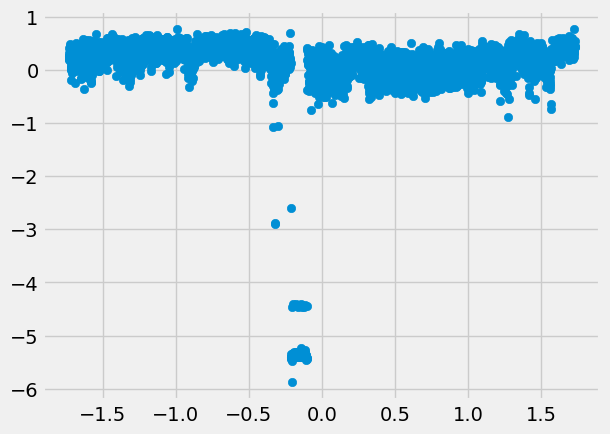

In [124]:
a = []
x = []
y=[]
for i in range(0, len(df)-1):
    a.append([i, df["value"][i]])    

X = a

X = StandardScaler().fit_transform(X)
for i in range(0, len(X)):
    x.append(X[i][0])
    y.append(X[i][1])

plt.scatter(x, y)
plt.show()

In [125]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['value'] = pd.to_numeric(df['value'])

In [126]:
values = df[['value']].to_numpy()

In [127]:
scaler = StandardScaler()
values_scaled = scaler.fit_transform(values)

In [128]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(values_scaled)

In [129]:
df['Cluster'] = clusters

In [130]:
df

timestamp   value  Cluster
0    2014-04-10 00:04:00  91.958        0
1    2014-04-10 00:09:00  94.798        0
2    2014-04-10 00:14:00  92.208        0
3    2014-04-10 00:19:00  93.722        0
4    2014-04-10 00:24:00  93.042        0
...                  ...     ...      ...
4027 2014-04-23 23:49:00  95.084        0
4028 2014-04-23 23:54:00  95.236        0
4029 2014-04-23 23:59:00  96.374        0
4030 2014-04-24 00:04:00  95.042        0
4031 2014-04-24 00:09:00  96.584        0

[4032 rows x 3 columns]

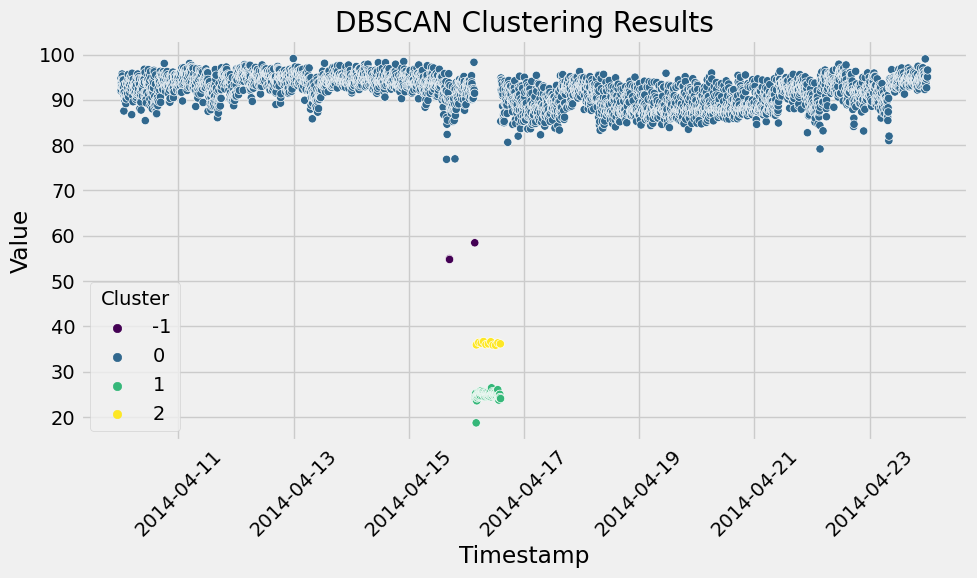

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='timestamp', y='value', hue='Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

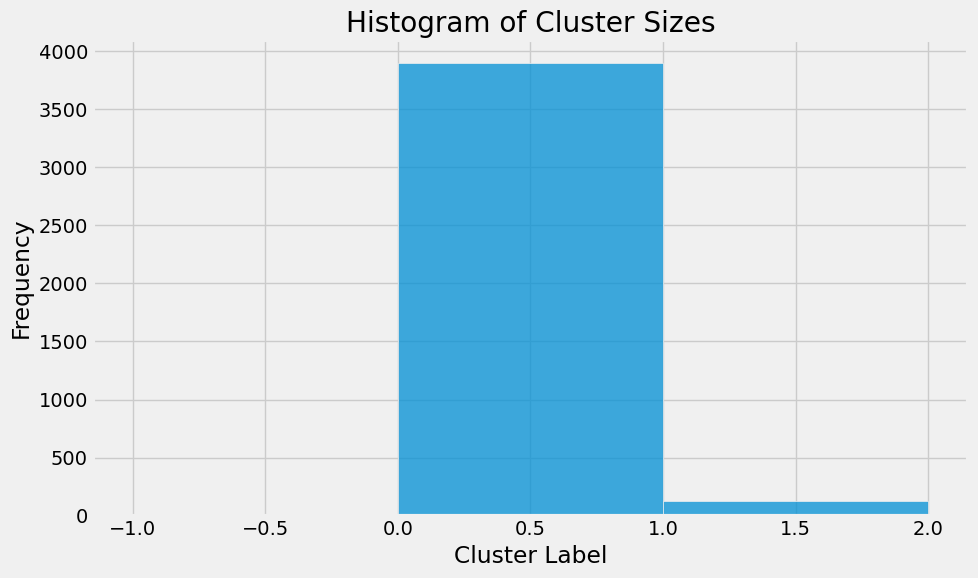

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cluster', binwidth=1, kde=False)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

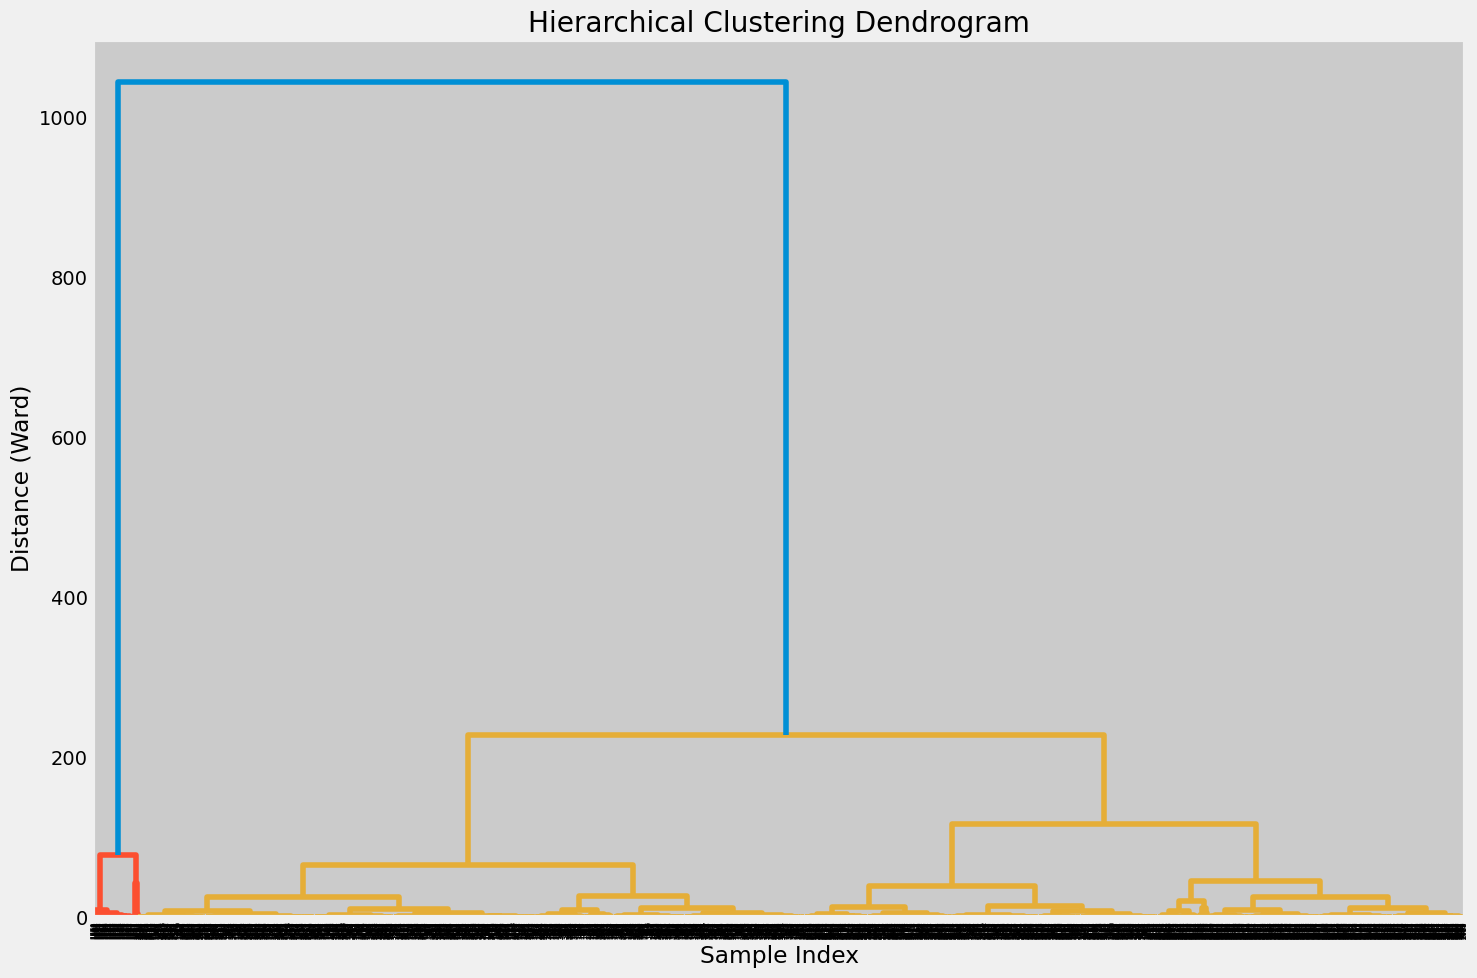

In [133]:
features = df[['value']].values 
Z = linkage(features, 'ward')

plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()

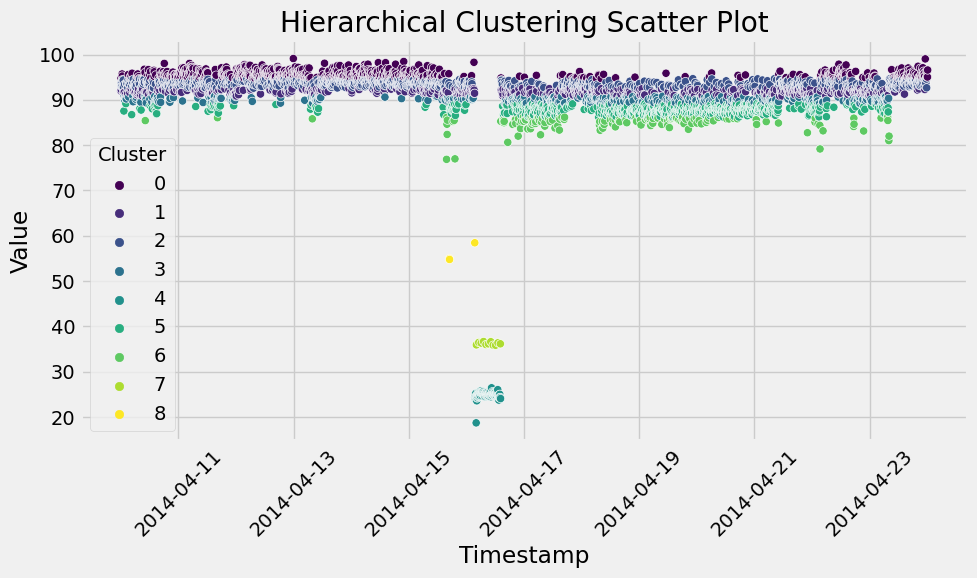

In [134]:
df['hc_labels'] = hc.fit_predict(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='timestamp', y='value', hue='hc_labels', palette='viridis', legend='full')
plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

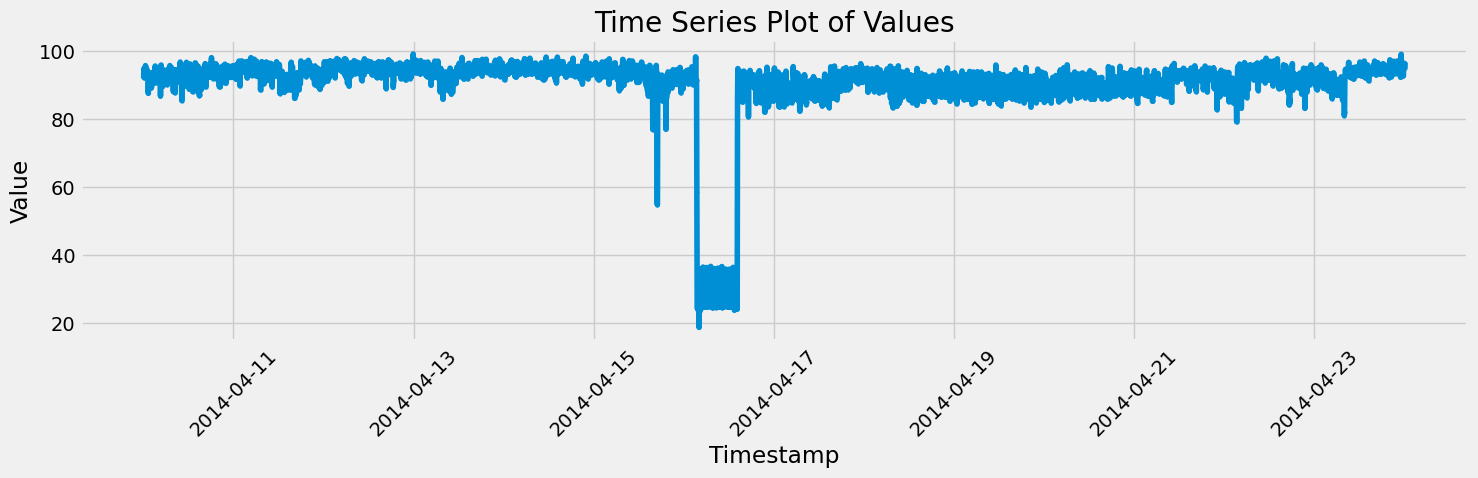

In [135]:
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['value'], marker='o', linestyle='-', markersize=2)
plt.title('Time Series Plot of Values')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

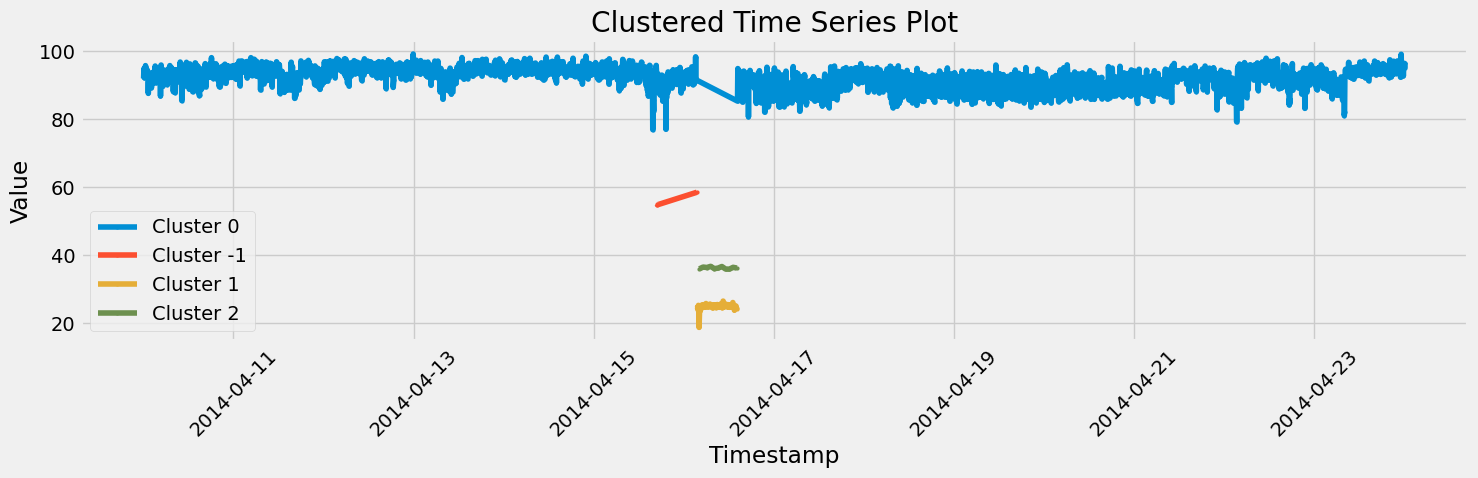

In [136]:
plt.figure(figsize=(15, 5))
unique_clusters = df['Cluster'].unique()
for cluster in unique_clusters:
    clustered_data = df[df['Cluster'] == cluster]
    plt.plot(clustered_data['timestamp'], clustered_data['value'], marker='o', linestyle='-', markersize=2, label=f'Cluster {cluster}')
plt.title('Clustered Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

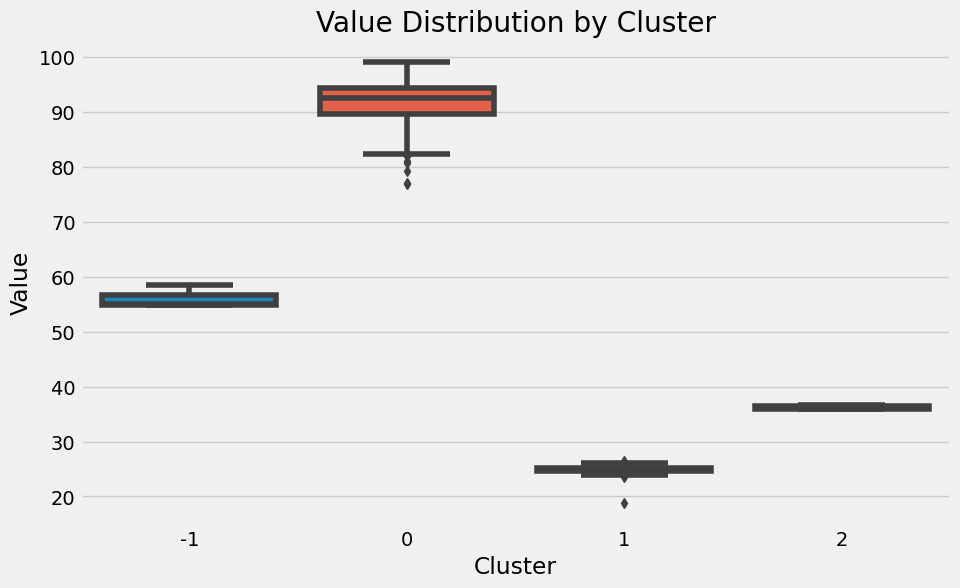

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='value', data=df)
plt.title('Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.show()

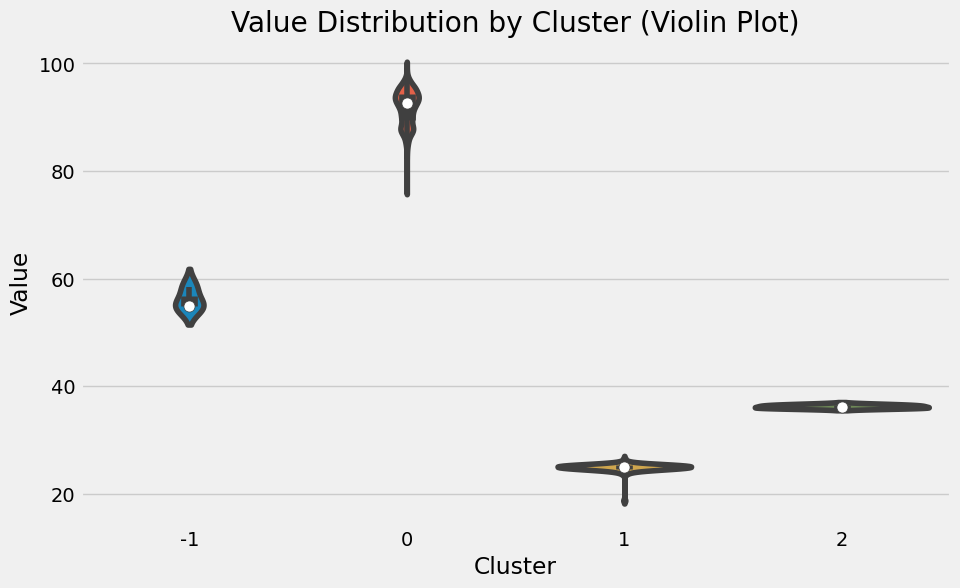

In [138]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cluster', y='value', data=df)
plt.title('Value Distribution by Cluster (Violin Plot)')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.show()

In [139]:
features = df.drop(['timestamp', 'Cluster'], axis=1)

In [140]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

In [141]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features)

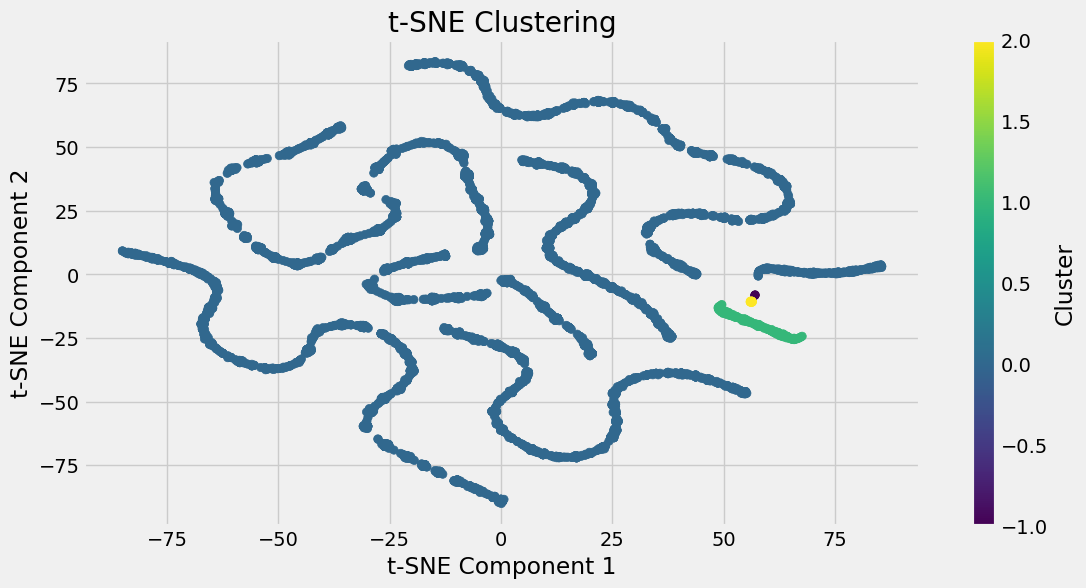

In [142]:
plt.figure(figsize=(12, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

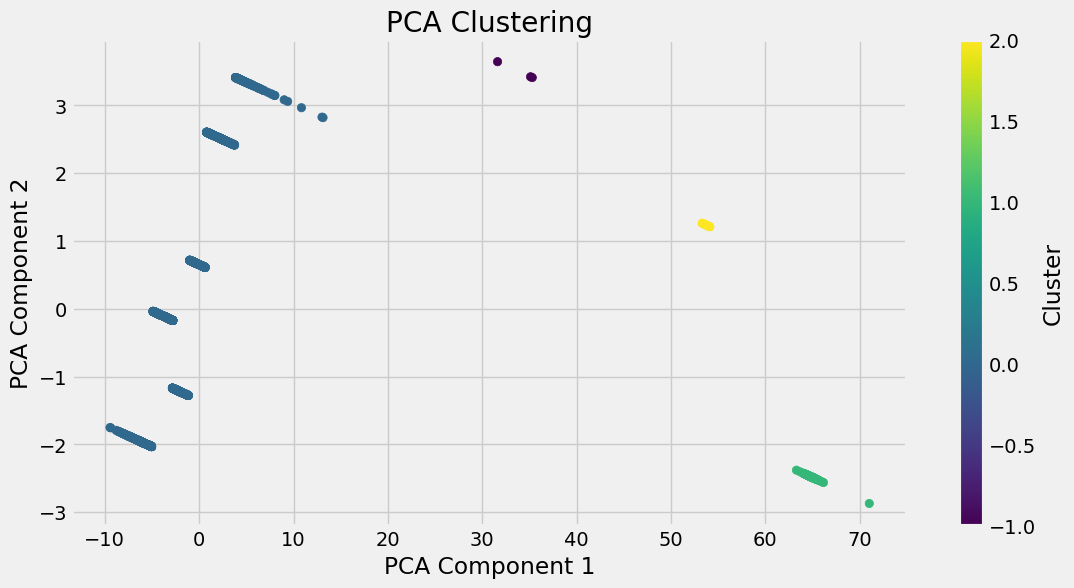

In [143]:
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()